# Assignment 3: Data Mining and Analysis
## Deadline: *May 26, 2019 by midnight*
## IMT 547 - Social Media Data Mining and Analysis

### Student Name: Nandy Giridharan
### Collaborator(s): None

In this assignment, you will practice the concepts and techniques of social media analysis that you've learned from this course. Part 1 and Part 2 will focus on content-based analysis. My best guess is that Part 1 is medium difficult. You will be asked to perform exploratory data analysis to answer questions related to movie ratings and box office success. Part 2 perhaps requires a longer time and more efforts where you will be asked to develop a machine learning model (Naive Bayes classifier) to classify movie ratings to be Rotten or Fresh based on their reviews. Part 3 is relatively simple and short. You will be asked to examine the structure of networks and discuss network properties.

There are also a couple of extra-credit questions. As usual, you are recommended to start as early as possible. You might get stuck somewhere, so you want to get stuck early and manage to figure them out. Try to make attempts to every question because you can still get partial points for your good efforts. Don't leave blanks!

You will use the following packages for this assignment:

In [1]:
# data analysis
import pandas as pd
import numpy as np
# text processing
import nltk
# machine learning
import sklearn
# social network analysis
import networkx as net
# plotting
import matplotlib.pyplot as plt
%matplotlib inline

from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from collections import Counter, OrderedDict
from nltk import PorterStemmer
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout


# You can import other packages if necessary

## Part 1 - Exploring Movie Data (16 pts)

In this part, we will work with the following dataset:
* movies.csv - This dataset contains a sample of movies including movie info, box office gross revenues, as well as audience and critic ratings. The dataset combines data from multiple sources: Rotten Tomatoes, The Numbers, and IMDB. The variable names started with 'rt' indicate the ones collected from the Rotten Tomatoes. For example, the variable 'rtAllCriticsRating' is average movies ratings from the Rotten Tomatoes critics.

You will perform two pieces of exploratory data analysis. **Extra credits ($\leq$ 4 pts)** may apply to the cases in which students have shown exceptional efforts in proposing a well-defined EDA plan, conducting a thorough EDA, creating great visualizations to support their analysis, etc.

If you are not familiar with the Rotten Tomatoes or IMDB, go spend some time to explore the websites. Here is an example movie page on the Rotten Tomatoes: https://www.rottentomatoes.com/m/the_theory_of_everything_2014

In [2]:
# Load the data
movies = pd.read_csv('a3-movies.csv')
movies.head(5)

,id,title,imdbID,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,rtAllCriticsNumRotten,rtAllCriticsScore,...,Production Budget,MPAA Rating,Running Time (min),Distributor,Source,Major Genre,Creative Type,Director,IMDB Rating,IMDB Votes
0,1,Toy story,114709,1995,toy_story,9,73,73,0,100,...,30000000.0,G,NaN,Walt Disney Pictures,Original Screenplay,Adventure,Kids Fiction,John Lasseter,8.2,151143.0
1,2,Jumanji,113497,1995,1068044-jumanji,5.6,28,13,15,46,...,65000000.0,PG,NaN,Sony Pictures,Based on Book/Short Story,Adventure,Fantasy,Joe Johnston,6.4,54973.0
2,7,Sabrina,47437,1954,1018047-sabrina,7.4,31,28,3,90,...,58000000.0,PG,NaN,Paramount Pictures,Remake,Romantic Comedy,Contemporary Fiction,Sydney Pollack,6.0,15749.0
3,10,GoldenEye,113189,1995,goldeneye,6.8,41,33,8,80,...,60000000.0,PG-13,NaN,MGM,Based on Book/Short Story,Action,Contemporary Fiction,Martin Campbell,7.2,69199.0
4,11,The American President,112346,1995,american_president,7,49,44,5,89,...,62000000.0,PG-13,NaN,Sony Pictures,Original Screenplay,Romantic Comedy,Contemporary Fiction,Rob Reiner,6.8,22780.0


In [3]:
movies.columns

Index(['id', 'title', 'imdbID', 'year', 'rtID', 'rtAllCriticsRating',
       'rtAllCriticsNumReviews', 'rtAllCriticsNumFresh',
       'rtAllCriticsNumRotten', 'rtAllCriticsScore', 'rtTopCriticsRating',
       'rtTopCriticsNumReviews', 'rtTopCriticsNumFresh',
       'rtTopCriticsNumRotten', 'rtTopCriticsScore', 'rtAudienceRating',
       'rtAudienceNumRatings', 'rtAudienceScore', 'US Gross',
       'Worldwide Gross', 'US DVD Sales', 'Production Budget', 'MPAA Rating',
       'Running Time (min)', 'Distributor', 'Source', 'Major Genre',
       'Creative Type', 'Director', 'IMDB Rating', 'IMDB Votes'],
      dtype='object')

### 1.1. Box Office Success (8 pts)

One of the overarching question would be: **what factors are associated with the box office success of movies?**

To answer this question, *think about your EDA plan carefully:* 
* What does the dataset look like? 
* What variables are you going to examine, and how? 
* What hypothese do you have?
* Are there any concerns or limitations of your analysis?

Please describe your detailed EDA strategies in words, then perform the proposed EDA and finally discuss your results. 

**Remember the key to a great EDA is often to create nice visualizations to explore the questions!**

Step 1. Your EDA plan:

My plan is to look at the data, perform certain basic checks on data, before I work on EDA.
Then I plan to compare Critic & Audience Score(as subsititute for Box office success) with multiple other variables. 

But this analysis might be biased due to low number of records in certain categories. To avoid that, I plan to check population of these variable categories before I make the final decision.

In [36]:
#View snapshot of the data
movies.head(5)

,id,title,imdbID,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,rtAllCriticsNumRotten,rtAllCriticsScore,...,Production Budget,MPAA Rating,Running Time (min),Distributor,Source,Major Genre,Creative Type,Director,IMDB Rating,IMDB Votes
0,1,Toy story,114709,1995,toy_story,9,73,73,0,100,...,30000000.0,G,NaN,Walt Disney Pictures,Original Screenplay,Adventure,Kids Fiction,John Lasseter,8.2,151143.0
1,2,Jumanji,113497,1995,1068044-jumanji,5.6,28,13,15,46,...,65000000.0,PG,NaN,Sony Pictures,Based on Book/Short Story,Adventure,Fantasy,Joe Johnston,6.4,54973.0
2,7,Sabrina,47437,1954,1018047-sabrina,7.4,31,28,3,90,...,58000000.0,PG,NaN,Paramount Pictures,Remake,Romantic Comedy,Contemporary Fiction,Sydney Pollack,6.0,15749.0
3,10,GoldenEye,113189,1995,goldeneye,6.8,41,33,8,80,...,60000000.0,PG-13,NaN,MGM,Based on Book/Short Story,Action,Contemporary Fiction,Martin Campbell,7.2,69199.0
4,11,The American President,112346,1995,american_president,7,49,44,5,89,...,62000000.0,PG-13,NaN,Sony Pictures,Original Screenplay,Romantic Comedy,Contemporary Fiction,Rob Reiner,6.8,22780.0


In [12]:
#Understand the data better
print("Number of records:",movies.shape[0],"\nNumber of columns:",movies.shape[1])

print("Number of unique movies in the list:", movies['title'].nunique())

movies1=movies.drop_duplicates()
print(movies1.shape)

Number of records: 2449 
Number of columns: 32
Number of unique movies in the list: 2420
(2449, 32)


There are some movies in the list which are repeated

In [13]:
x=pd.DataFrame(movies['id'].groupby(movies['title']).count().reset_index())
print("Following movies are repeated:\n")

for i in range(len(x)):
    if x['id'][i]>1:
        print(x['title'][i],x['id'][i])


Following movies are repeated:

21 2
A Nightmare on Elm Street 2
Alice in Wonderland 2
Around the World in 80 Days 2
Ben-Hur 2
Casino Royale 2
Crash 2
Dawn of the Dead 2
Day of the Dead 2
Death at a Funeral 2
Dracula 2
Eureka 2
Friday the 13th 2
Hamlet 2
House of Wax 2
House on Haunted Hill 2
King Kong 2
Night of the Living Dead 2
Notorious 2
Peter Pan 2
Star Trek 2
The Alamo 2
The Fog 2
The Hurricane 2
The Island 2
The Omen 2
The Phantom of the Opera 2
The Texas Chainsaw Massacre 2
Twilight 2


In [14]:
print("Print full information about the movies which are repeated:\n")
for i in range(len(x)):
    if x['id'][i]>1:
        #print(x['title'][i],x['id'][i])
        for j in range(len(movies)):
            if(x['title'][i]==movies['title'][j]):
                print(movies.iloc[j,:])


Print full information about the movies which are repeated:

id                                            52767
title                                            21
imdbID                                        75610
year                                           1977
rtID                                          21_up
rtAllCriticsRating                                0
rtAllCriticsNumReviews                            1
rtAllCriticsNumFresh                              1
rtAllCriticsNumRotten                             0
rtAllCriticsScore                               100
rtTopCriticsRating                                0
rtTopCriticsNumReviews                            0
rtTopCriticsNumFresh                              0
rtTopCriticsNumRotten                             0
rtTopCriticsScore                                 0
rtAudienceRating                                  0
rtAudienceNumRatings                              0
rtAudienceScore                                   0
US 

id                                             1287
title                                       Ben-Hur
imdbID                                        52618
year                                           1959
rtID                                         benhur
rtAllCriticsRating                              7.8
rtAllCriticsNumReviews                           33
rtAllCriticsNumFresh                             30
rtAllCriticsNumRotten                             3
rtAllCriticsScore                                90
rtTopCriticsRating                                0
rtTopCriticsNumReviews                            4
rtTopCriticsNumFresh                              3
rtTopCriticsNumRotten                             1
rtTopCriticsScore                                75
rtAudienceRating                                3.7
rtAudienceNumRatings                          25817
rtAudienceScore                                  80
US Gross                                      9e+06
Worldwide Gr

id                                                4098
title                                 Dawn of the Dead
imdbID                                          363547
year                                              2004
rtID                                  dawn_of_the_dead
rtAllCriticsRating                                 6.7
rtAllCriticsNumReviews                             171
rtAllCriticsNumFresh                               130
rtAllCriticsNumRotten                               41
rtAllCriticsScore                                   76
rtTopCriticsRating                                 6.1
rtTopCriticsNumReviews                              32
rtTopCriticsNumFresh                                20
rtTopCriticsNumRotten                               12
rtTopCriticsScore                                   62
rtAudienceRating                                   3.4
rtAudienceNumRatings                             49706
rtAudienceScore                                     75
US Gross  

id                                  4271
title                             Eureka
imdbID                            243889
year                                2000
rtID                      1107897-eureka
rtAllCriticsRating                   7.2
rtAllCriticsNumReviews                42
rtAllCriticsNumFresh                  38
rtAllCriticsNumRotten                  4
rtAllCriticsScore                     90
rtTopCriticsRating                   6.8
rtTopCriticsNumReviews                19
rtTopCriticsNumFresh                  16
rtTopCriticsNumRotten                  3
rtTopCriticsScore                     84
rtAudienceRating                     4.1
rtAudienceNumRatings                 667
rtAudienceScore                       88
US Gross                           49388
Worldwide Gross                    76654
US DVD Sales                         NaN
Production Budget                  2e+06
MPAA Rating                    Not Rated
Running Time (min)                   NaN
Distributor     

id                                6629
title                     House of Wax
imdbID                          397065
year                              2005
rtID                      house_of_wax
rtAllCriticsRating                 4.3
rtAllCriticsNumReviews             148
rtAllCriticsNumFresh                37
rtAllCriticsNumRotten              111
rtAllCriticsScore                   25
rtTopCriticsRating                 4.5
rtTopCriticsNumReviews              30
rtTopCriticsNumFresh                 6
rtTopCriticsNumRotten               24
rtTopCriticsScore                   20
rtAudienceRating                   2.8
rtAudienceNumRatings             39495
rtAudienceScore                     54
US Gross                      2.38e+07
Worldwide Gross               2.38e+07
US DVD Sales                       NaN
Production Budget               658000
MPAA Rating                          R
Running Time (min)                 NaN
Distributor                        NaN
Source                   

id                                                     968
title                             Night of the Living Dead
imdbID                                               63350
year                                                  1968
rtID                      1015052-night_of_the_living_dead
rtAllCriticsRating                                     8.5
rtAllCriticsNumReviews                                  45
rtAllCriticsNumFresh                                    43
rtAllCriticsNumRotten                                    2
rtAllCriticsScore                                       95
rtTopCriticsRating                                       7
rtTopCriticsNumReviews                                   5
rtTopCriticsNumFresh                                     4
rtTopCriticsNumRotten                                    1
rtTopCriticsScore                                       80
rtAudienceRating                                       3.7
rtAudienceNumRatings                                 261

id                                       4042
title                               The Alamo
imdbID                                 318974
year                                     2004
rtID                        general-santa-ana
rtAllCriticsRating                          0
rtAllCriticsNumReviews                      0
rtAllCriticsNumFresh                        0
rtAllCriticsNumRotten                       0
rtAllCriticsScore                           0
rtTopCriticsRating                          0
rtTopCriticsNumReviews                      0
rtTopCriticsNumFresh                        0
rtTopCriticsNumRotten                       0
rtTopCriticsScore                           0
rtAudienceRating                            0
rtAudienceNumRatings                        0
rtAudienceScore                             0
US Gross                              7.9e+06
Worldwide Gross                       7.9e+06
US DVD Sales                              NaN
Production Budget                 

id                                       1350
title                                The Omen
imdbID                                  75005
year                                     1976
rtID                             1015517-omen
rtAllCriticsRating                          7
rtAllCriticsNumReviews                     32
rtAllCriticsNumFresh                       27
rtAllCriticsNumRotten                       5
rtAllCriticsScore                          84
rtTopCriticsRating                          0
rtTopCriticsNumReviews                      2
rtTopCriticsNumFresh                        1
rtTopCriticsNumRotten                       1
rtTopCriticsScore                          50
rtAudienceRating                          3.5
rtAudienceNumRatings                    17016
rtAudienceScore                            78
US Gross                          4.85709e+07
Worldwide Gross                   4.85709e+07
US DVD Sales                              NaN
Production Budget                 

We find that, some movies are released in different years, and some have different values in different columns. I am not dropping any record, as I am not sure which one to retain.



To determine box office success, I need to convert ratings variables into numbers. Will then check the distribution of variables to decide:




In [15]:
movies['rtAllCriticsRating'] = pd.to_numeric(movies['rtAllCriticsRating'], errors='coerce')
movies['rtAllCriticsNumReviews'] = pd.to_numeric(movies['rtAllCriticsNumReviews'], errors='coerce')
movies['rtAllCriticsNumFresh'] = pd.to_numeric(movies['rtAllCriticsNumFresh'], errors='coerce')
movies['rtAllCriticsNumRotten'] = pd.to_numeric(movies['rtAllCriticsNumRotten'], errors='coerce')
movies['rtAllCriticsScore'] = pd.to_numeric(movies['rtAllCriticsScore'], errors='coerce')
movies['rtTopCriticsRating'] = pd.to_numeric(movies['rtTopCriticsRating'], errors='coerce')
movies['rtTopCriticsNumReviews'] = pd.to_numeric(movies['rtTopCriticsNumReviews'], errors='coerce')
movies['rtTopCriticsNumFresh'] = pd.to_numeric(movies['rtTopCriticsNumFresh'], errors='coerce')
movies['rtTopCriticsNumRotten'] = pd.to_numeric(movies['rtTopCriticsNumRotten'], errors='coerce')
movies['rtTopCriticsScore'] = pd.to_numeric(movies['rtTopCriticsScore'], errors='coerce')
movies['rtAudienceRating'] = pd.to_numeric(movies['rtAudienceRating'], errors='coerce')
movies['rtAudienceNumRatings'] = pd.to_numeric(movies['rtAudienceNumRatings'], errors='coerce')
movies['rtAudienceScore'] = pd.to_numeric(movies['rtAudienceScore'], errors='coerce')
movies['US Gross'] = pd.to_numeric(movies['US Gross'], errors='coerce')
movies['Worldwide Gross'] = pd.to_numeric(movies['Worldwide Gross'], errors='coerce')
movies['US DVD Sales'] = pd.to_numeric(movies['US DVD Sales'], errors='coerce')
movies['US DVD Sales'] = pd.to_numeric(movies['US DVD Sales'], errors='coerce')
movies['box_office'] = 0 
for i in range(len(movies)):
    movies['box_office'][i]=(movies['rtAudienceScore'][i]+movies['rtAllCriticsScore'][i])/2
    
movies.describe()


C:\Users\Sakura\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Sakura\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,id,imdbID,year,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,rtAllCriticsNumRotten,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,...,rtAudienceNumRatings,rtAudienceScore,US Gross,Worldwide Gross,US DVD Sales,Production Budget,Running Time (min),IMDB Rating,IMDB Votes,box_office
count,2449.000000,2.449000e+03,2449.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,...,2.430000e+03,2430.000000,2.446000e+03,2.446000e+03,4.110000e+02,2.448000e+03,998.00000,2414.000000,2414.000000,2430.000000
mean,12459.585953,2.566623e+05,1996.589220,5.464527,82.124280,46.255556,35.868724,52.288066,4.529259,18.769547,...,3.805455e+04,59.367901,4.630408e+07,8.791949e+07,3.771489e+07,3.205339e+07,110.97996,6.319014,32865.281276,55.813786
std,18109.348087,2.038365e+05,12.736148,2.001922,59.592304,45.968272,33.988175,30.001265,2.636138,13.543564,...,9.705172e+04,24.114530,5.954117e+07,1.403789e+08,4.891853e+07,3.438546e+07,20.65234,1.228704,46481.909718,24.224009
min,1.000000,4.972000e+03,1915.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,6.184540e+05,2.180000e+02,46.00000,1.600000,18.000000,0.000000
25%,2082.000000,1.134630e+05,1995.000000,4.400000,32.000000,12.000000,8.000000,26.000000,3.200000,6.000000,...,3.193250e+03,47.000000,8.330910e+06,1.104246e+07,1.214488e+07,8.000000e+06,95.00000,5.600000,6769.500000,39.000000
50%,4254.000000,1.959450e+05,2000.000000,5.700000,66.000000,31.000000,24.000000,54.000000,5.100000,18.000000,...,1.172700e+04,64.000000,2.584990e+07,3.556828e+07,2.240125e+07,2.000000e+07,108.00000,6.400000,18024.500000,57.500000
75%,7450.000000,3.607170e+05,2004.000000,6.900000,127.000000,64.000000,57.000000,80.000000,6.600000,31.000000,...,3.664900e+04,77.000000,5.970765e+07,1.042159e+08,3.870586e+07,4.500000e+07,122.00000,7.200000,39414.250000,75.500000
max,64957.000000,1.213644e+06,2011.000000,9.400000,281.000000,265.000000,171.000000,100.000000,9.400000,48.000000,...,1.768593e+06,98.000000,6.007882e+08,1.842880e+09,3.525821e+08,3.000000e+08,222.00000,9.200000,519541.000000,98.500000


I have created a variable called "Box office" as an average of critics and audience rating, which will be used to define whether the movie was box office success or not. In the EDA below, I will check how this is related to other variables. My hypothesis is that, certain genres such as documentary or movies that appeal to wider audience(U rating) will have better box office value.

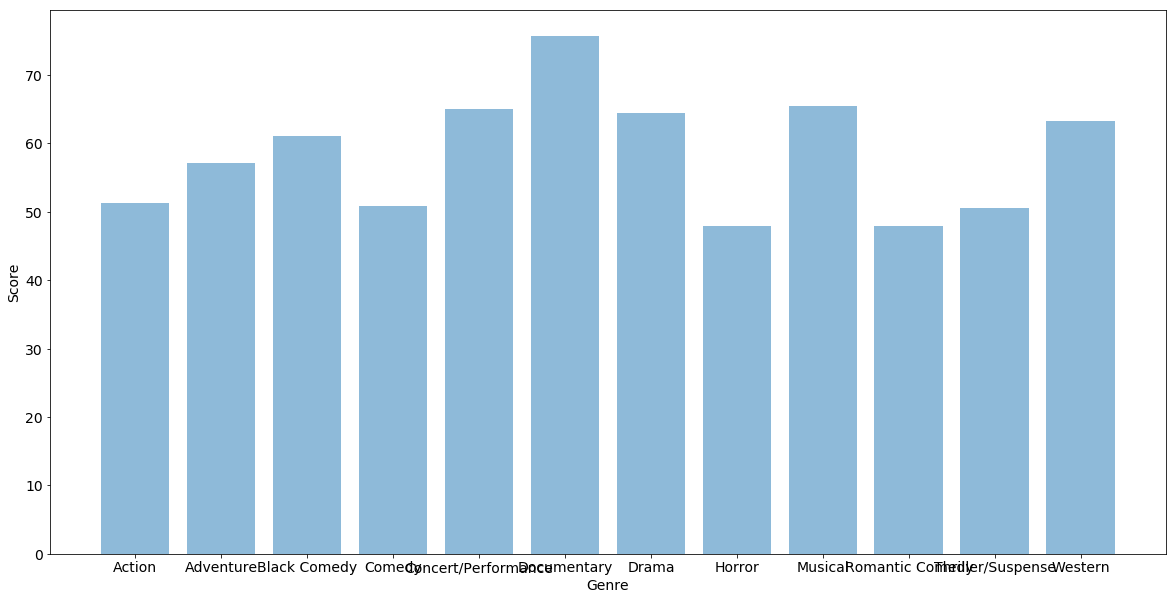

In [16]:
year_boxoffice = movies.groupby('Major Genre')['box_office'].mean()
x = year_boxoffice.index
y = year_boxoffice.values

plt.bar(x, y, align='center', alpha=0.5)
plt.ylabel('Score')
plt.xlabel('Genre')

plt.rcParams["figure.figsize"] = [30,10]
plt.rcParams.update({'font.size': 14})
plt.show()

Documentary, Musical/Drama genres have better box office rating.

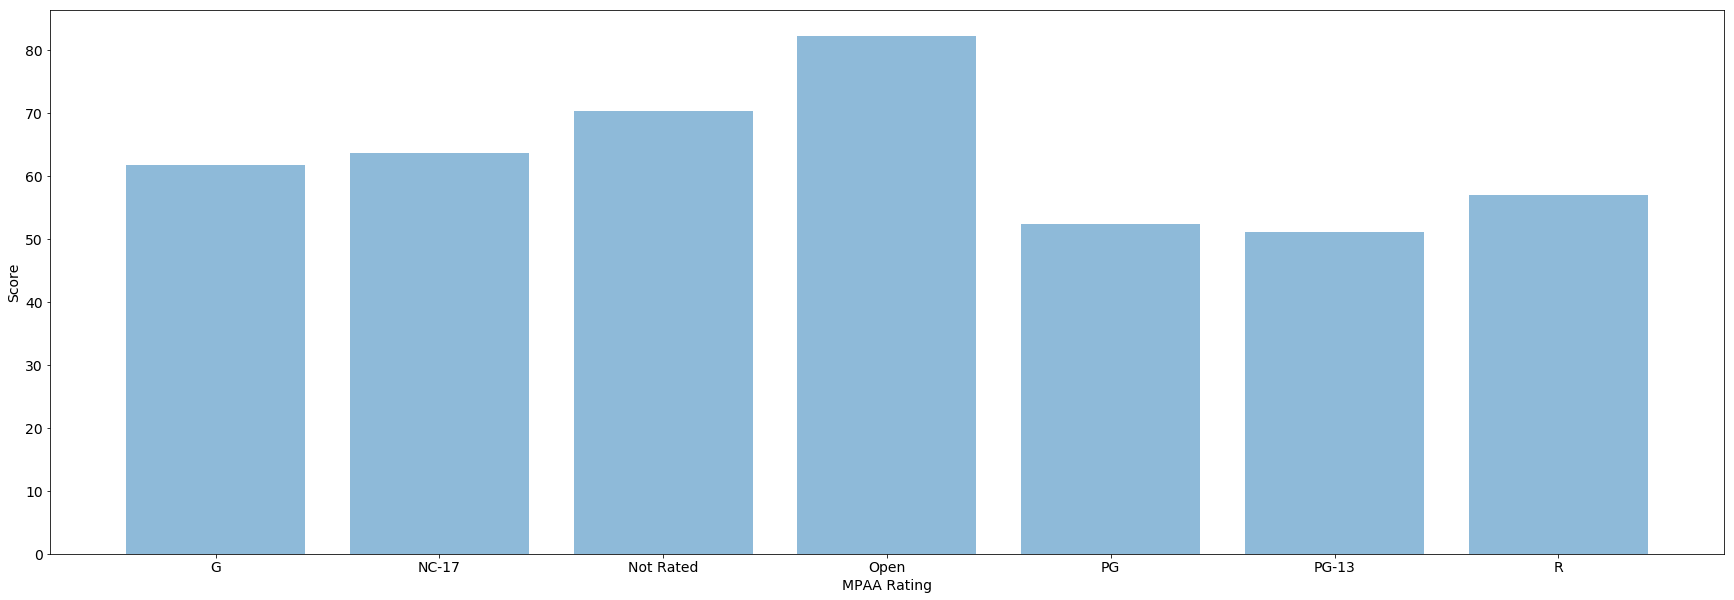

In [17]:
year_boxoffice = movies.groupby('MPAA Rating')['box_office'].mean()
x = year_boxoffice.index
y = year_boxoffice.values

plt.bar(x, y, align='center', alpha=0.5)
plt.ylabel('Score')
plt.xlabel('MPAA Rating')

plt.rcParams["figure.figsize"] = [20,10]
plt.rcParams.update({'font.size': 16})
plt.show()

Open MPAA rating has the highest box office collection

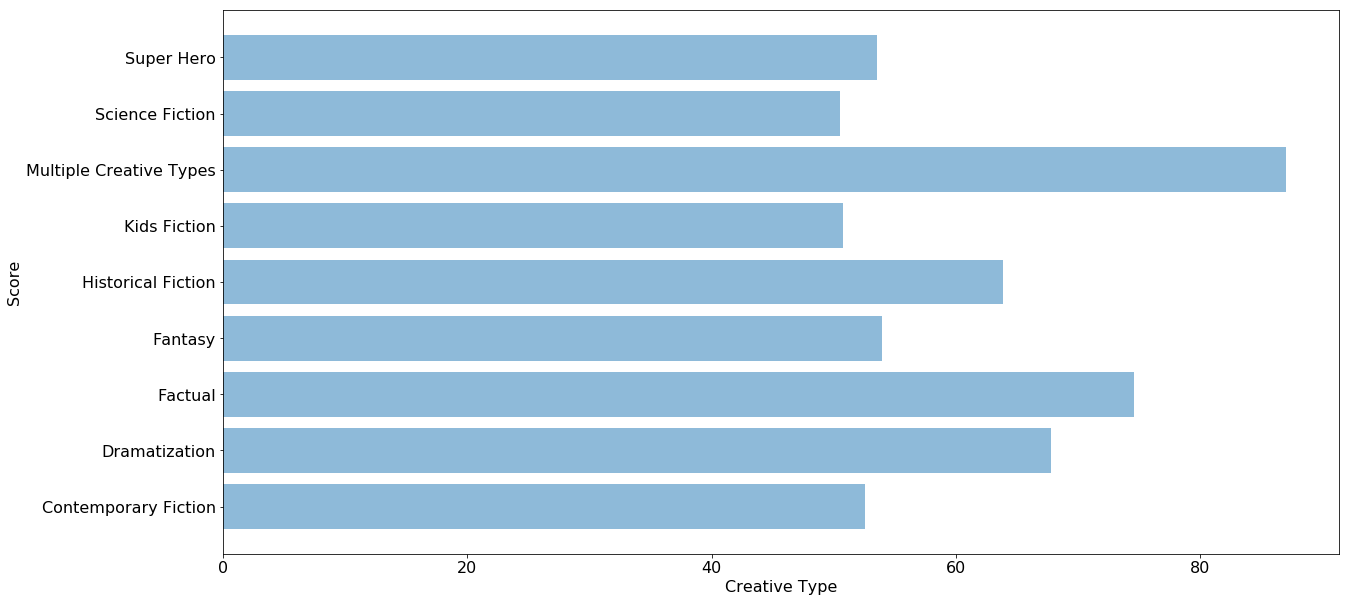

In [18]:
year_boxoffice = movies.groupby('Creative Type')['box_office'].mean()
x = year_boxoffice.index
y = year_boxoffice.values

plt.barh(x, y, align='center', alpha=0.5)
plt.ylabel('Score')
plt.xlabel('Creative Type')

plt.rcParams["figure.figsize"] = [20,10]
plt.rcParams.update({'font.size': 14})
plt.show()

Multiple creative types have the best box office rating.

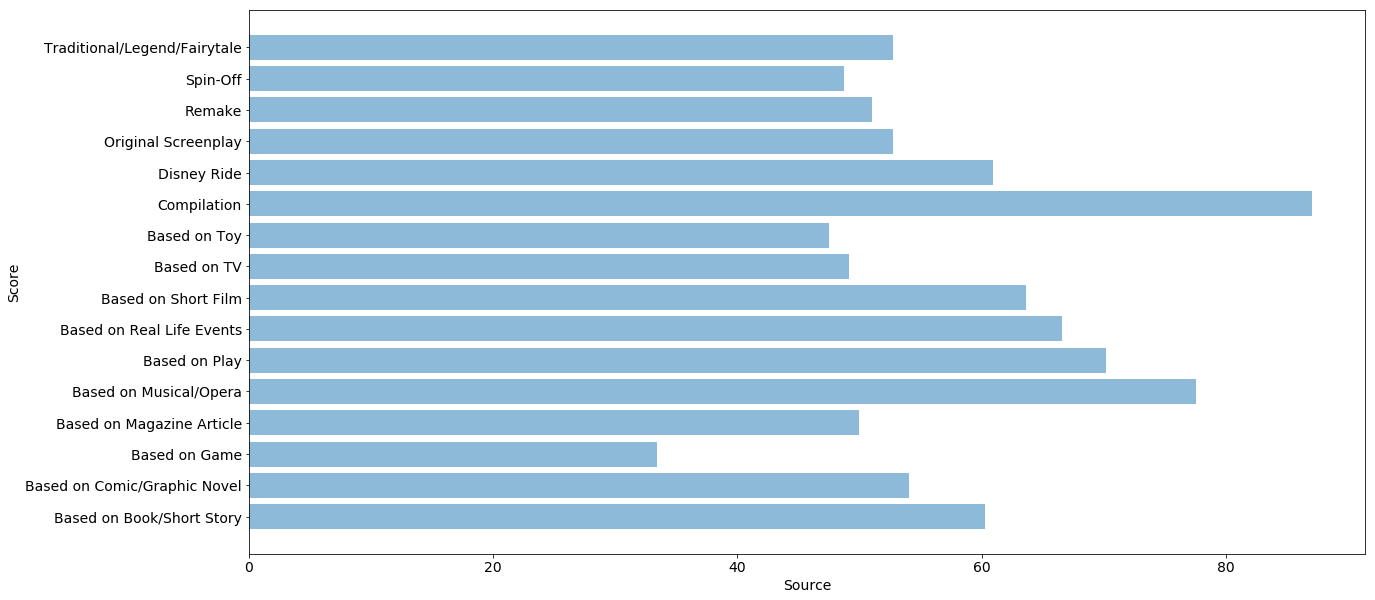

In [19]:
year_boxoffice = movies.groupby('Source')['box_office'].mean()
x = year_boxoffice.index
y = year_boxoffice.values

plt.barh(x, y, align='center', alpha=0.5)
plt.ylabel('Score')
plt.xlabel('Source')

plt.rcParams["figure.figsize"] = [20,10]
plt.rcParams.update({'font.size': 12})
plt.show()

Compilation(which might be more correlated to Multiple creative type) have high box office rating

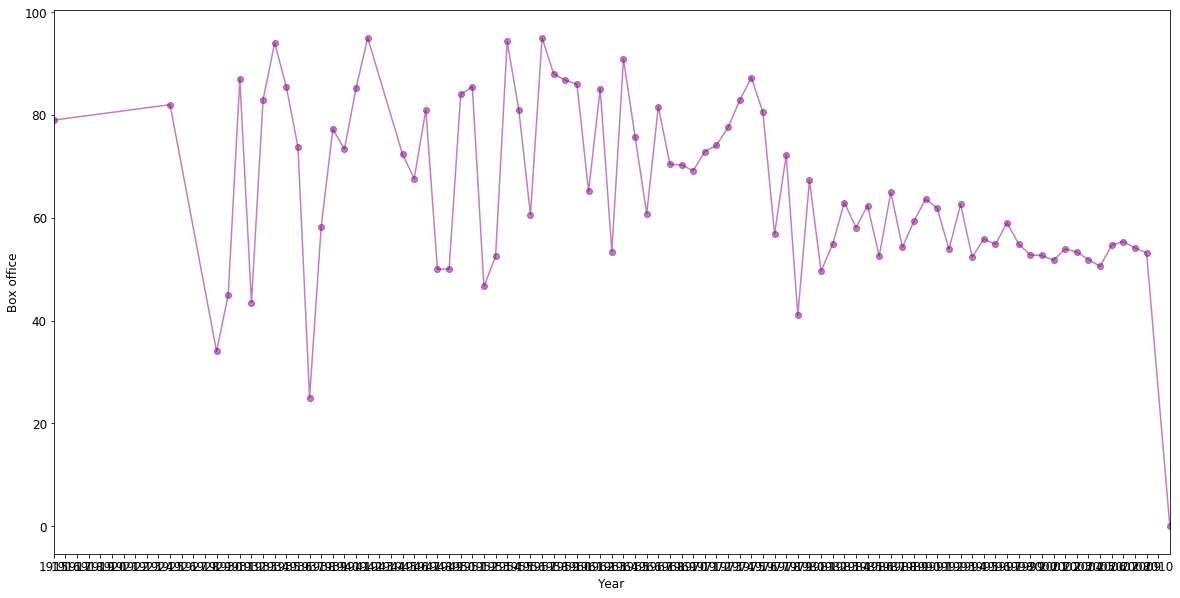

In [20]:
year_boxoffice = movies.groupby('year')['box_office'].mean()

x = year_boxoffice.index
y = year_boxoffice.values
fig, ax = plt.subplots()
ax.plot(x, y, color = 'purple', alpha=0.5)
ax.scatter(x, y, color = 'purple', alpha=0.5)
ax.set(xlabel = 'Year', ylabel = 'Box office')
ax.set_xlim([1915,2011])
ax.set_xticks(np.arange(1915,2011))
plt.rcParams["figure.figsize"] = [40,10]
plt.rcParams.update({'font.size': 24})
plt.show()

I also wanted to check whether there was some bias on older movies getting appreciated more than the recent movies. We can see that there is high variability in box office rating for older movies. Newer movies get an average score of 60s.

Step 3. Discussion:

I have found following insights from the EDA:
    * Movies which appeal to wider audience(Open MPAA rating, Musical/Drama movies) have better box office 
    * Movies which are critically acclaimed(Documentary genre or Multiple creative type) have a good box office 
    * Movies based on games dont do well at the box office
    * Ratings have stabilized over the years, may be due to more # movies & # people rating them 

But to make sure that the insights are not biased, I wanted to check whether I see the results based on # records

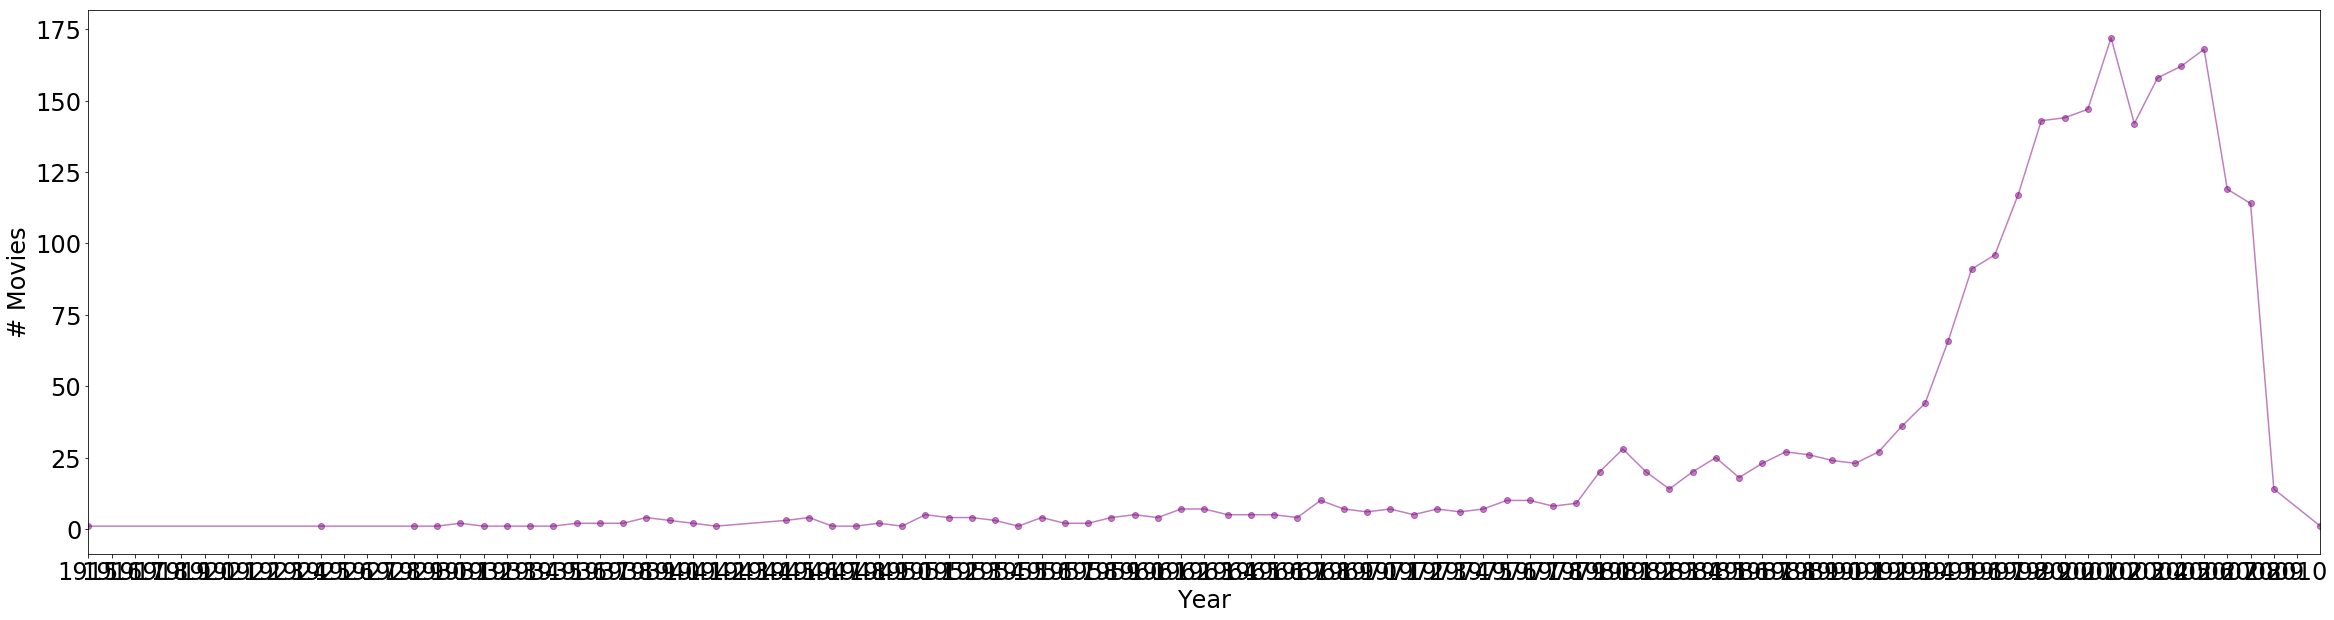

In [21]:
year_boxoffice = movies.groupby('year')['box_office'].count()

x = year_boxoffice.index
y = year_boxoffice.values
fig, ax = plt.subplots()
ax.plot(x, y, color = 'purple', alpha=0.5)
ax.scatter(x, y, color = 'purple', alpha=0.5)
ax.set(xlabel = 'Year', ylabel = '# Movies')
ax.set_xlim([1915,2011])
ax.set_xticks(np.arange(1915,2011))
plt.rcParams["figure.figsize"] = [40,10]
plt.rcParams.update({'font.size': 24})
plt.show()

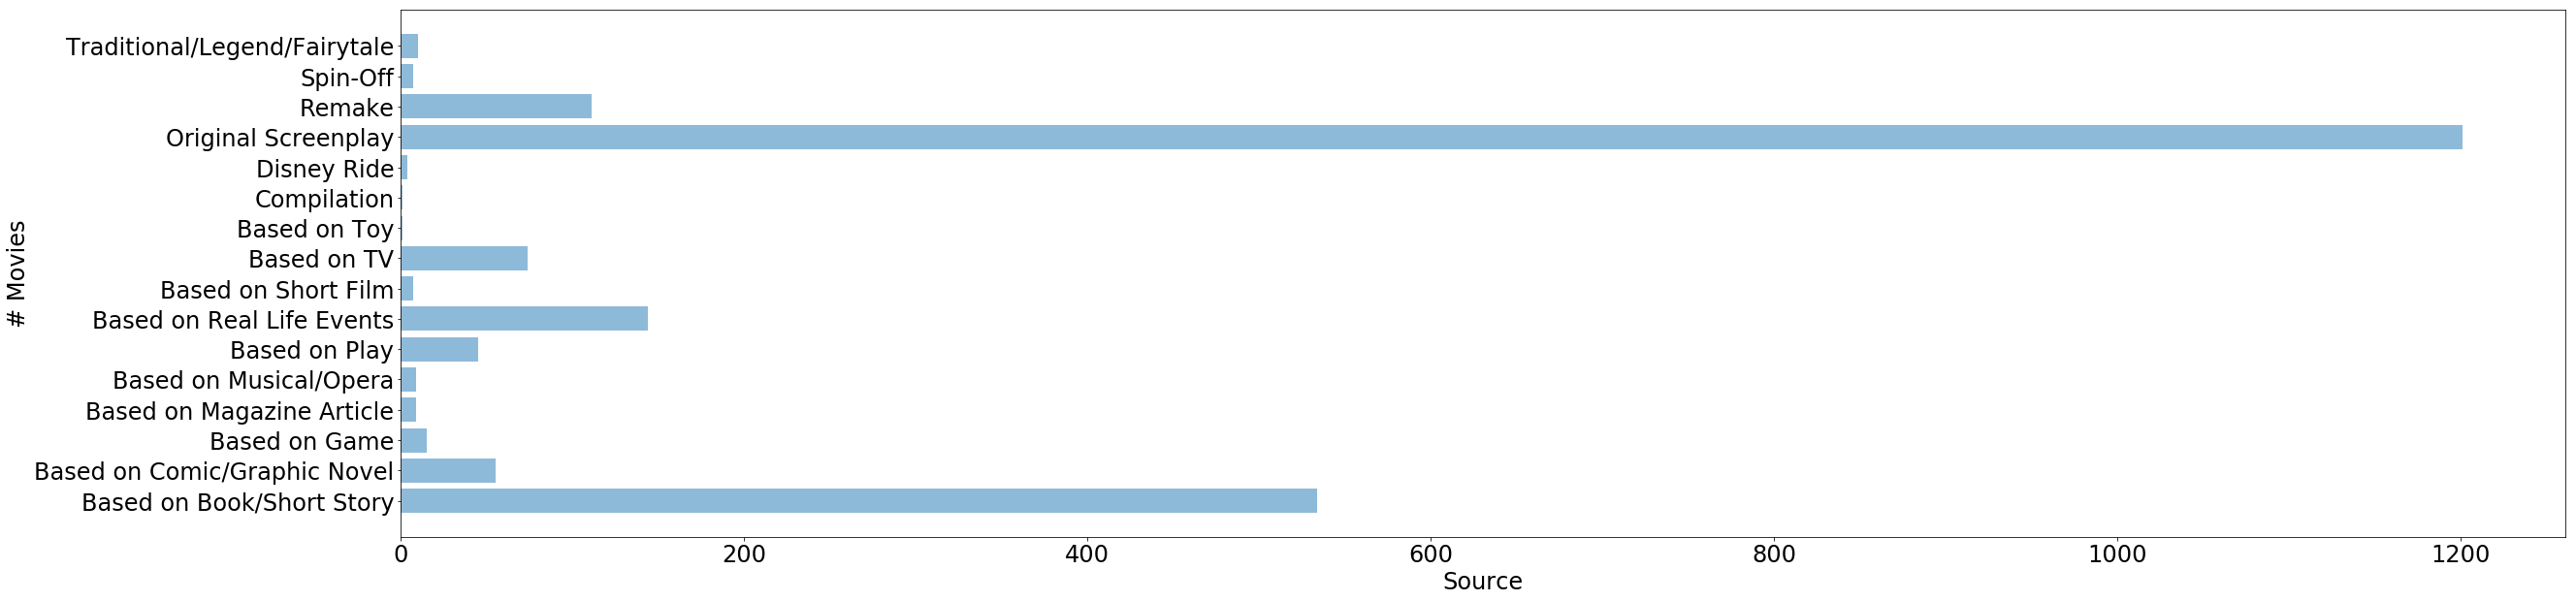

In [22]:
year_boxoffice = movies.groupby('Source')['box_office'].count()
x = year_boxoffice.index
y = year_boxoffice.values

plt.barh(x, y, align='center', alpha=0.5)
plt.ylabel('# Movies')
plt.xlabel('Source')

plt.rcParams["figure.figsize"] = [20,10]
plt.rcParams.update({'font.size': 12})
plt.show()

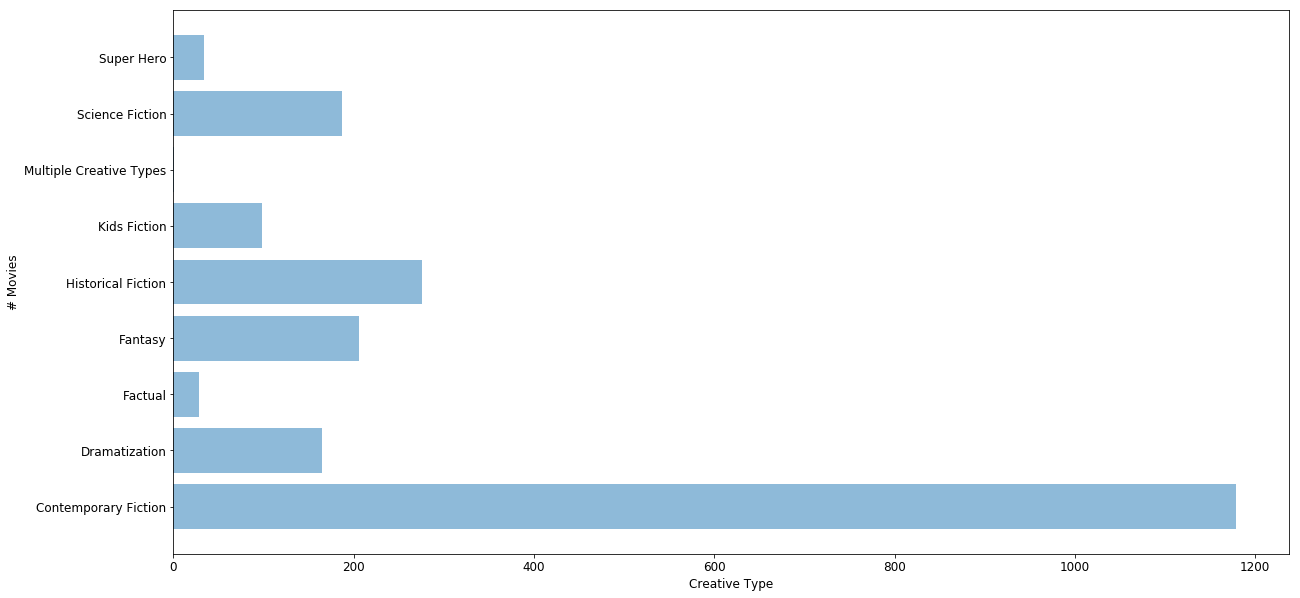

In [23]:
year_boxoffice = movies.groupby('Creative Type')['box_office'].count()
x = year_boxoffice.index
y = year_boxoffice.values

plt.barh(x, y, align='center', alpha=0.5)
plt.ylabel('# Movies')
plt.xlabel('Creative Type')

plt.rcParams["figure.figsize"] = [20,10]
plt.rcParams.update({'font.size': 14})
plt.show()

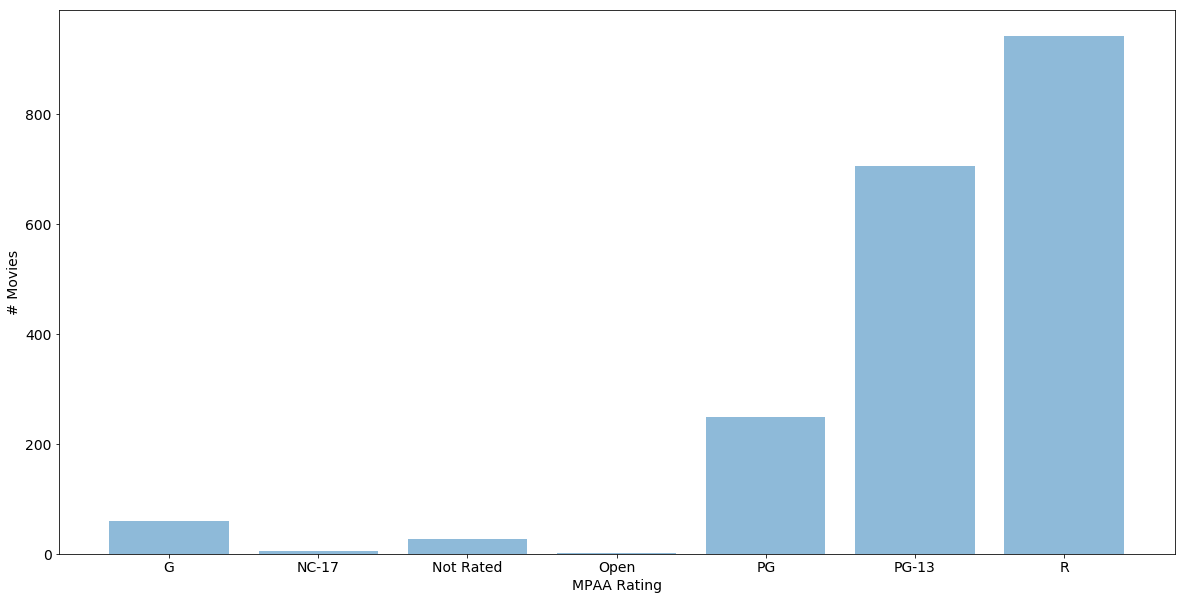

In [24]:
year_boxoffice = movies.groupby('MPAA Rating')['box_office'].count()
x = year_boxoffice.index
y = year_boxoffice.values

plt.bar(x, y, align='center', alpha=0.5)
plt.ylabel('# Movies')
plt.xlabel('MPAA Rating')

plt.rcParams["figure.figsize"] = [20,10]
plt.rcParams.update({'font.size': 16})
plt.show()

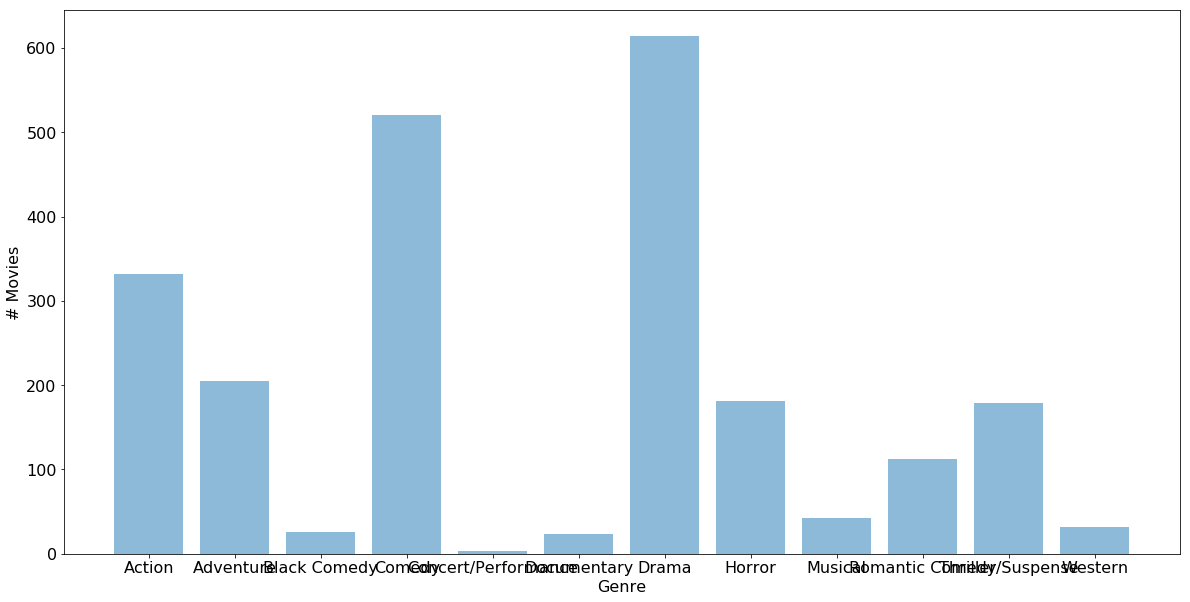

In [25]:
year_boxoffice = movies.groupby('Major Genre')['box_office'].count()
x = year_boxoffice.index
y = year_boxoffice.values

plt.bar(x, y, align='center', alpha=0.5)
plt.ylabel('# Movies')
plt.xlabel('Genre')

plt.rcParams["figure.figsize"] = [30,10]
plt.rcParams.update({'font.size': 14})
plt.show()

Based on the EDA, I find that the conclusions I came up with earlier are biased due to low # records. I have tweaked my insights to following:

* 'R' and not 'Open' MPAA rating has high box office score
* 'Drama' and not 'Documentary' has high box office score
* 'Based on Book/Short story' has good box office
*  Will not be able to make any decision on creative type, as most of them fall in Contemproary fiction. And other categories have very few # movies, to make any conclusive decision.
* The ratings might be behaving with high variability because of very few movie records in early years. And the constant line which we saw for box office score(in previous EDA) is the averaged out line.

### 1.2. Consistency between movie ratings (8 pts)

Next, we will compare movie ratings given by critics versus audience on the Rotten tomatoes.

* Do users agree with critics in terms of movie ratings on the Rotten Tomatoes? When they do and when they don't?

Step 1. Your EDA plan:

To check whether audience agree with critics on movie ratings, I have decided to create a variable with the difference between Audience & Critic as its value. This will be used to determine whether the ratings differ too much or not by different categories. 

I plan to check them against the same variables I considered for previous EDA. This will help me determine whether the previous results were biased by audience/critic score or not.

In [26]:
movies['rating_diff'] = 0 
movies['rating_diff_flag'] = 0 

movies['rating_diff']=movies['rtAudienceRating']-movies['rtAllCriticsRating']
movies['rating_diff']=movies['rating_diff'].abs()

movies['rating_diff_flag']=0
movies['rating_diff_flag'][movies.rating_diff >2]=1

#print(movies.head(10))

C:\Users\Sakura\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


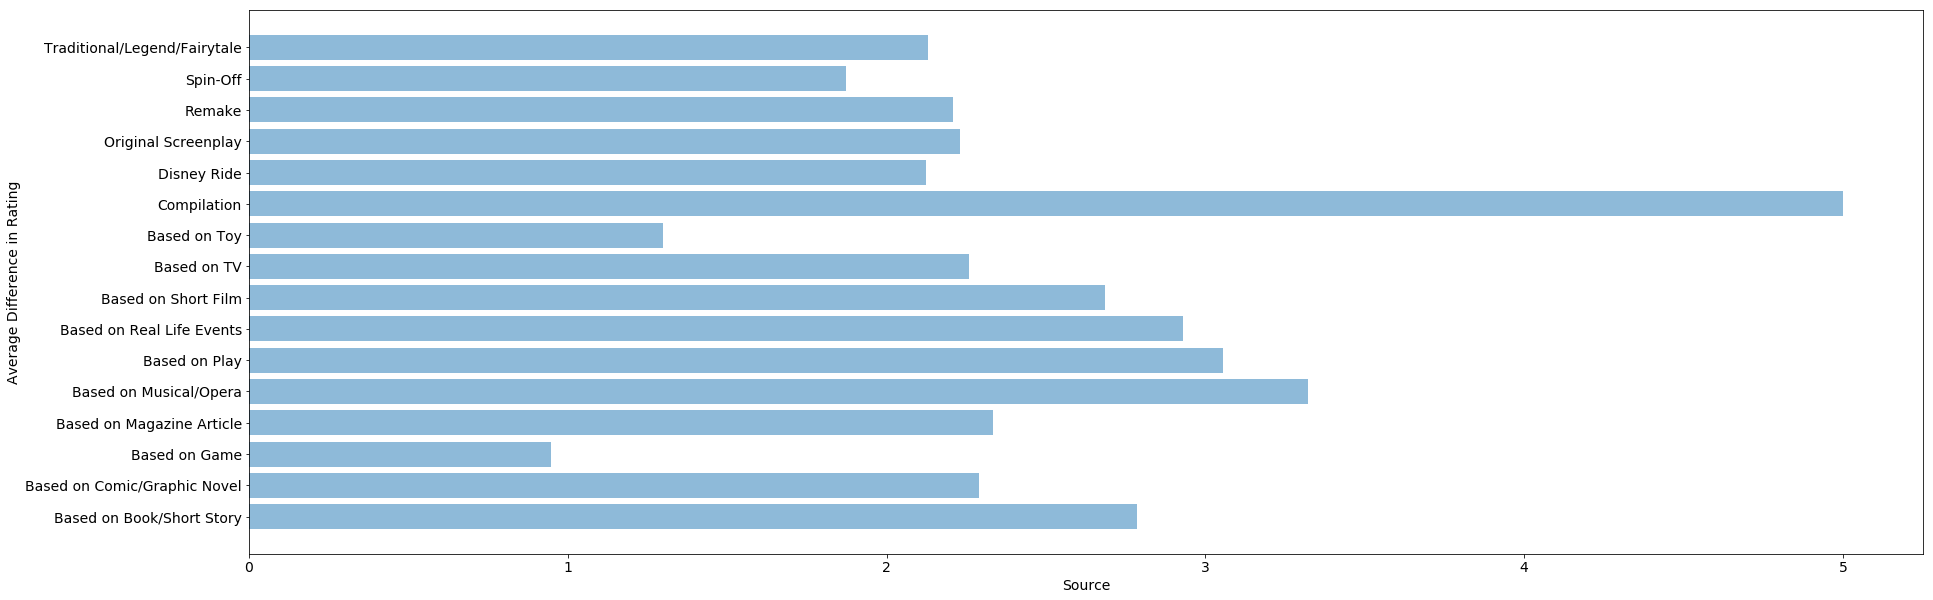

In [27]:
source_s = movies.groupby('Source')['rating_diff'].mean()

x = source_s.index
y = source_s.values

plt.barh(x, y, align='center', alpha=0.5)
plt.ylabel('Average Difference in Rating')
plt.xlabel('Source')

plt.rcParams["figure.figsize"] = [20,10]
plt.rcParams.update({'font.size': 14})
plt.show()

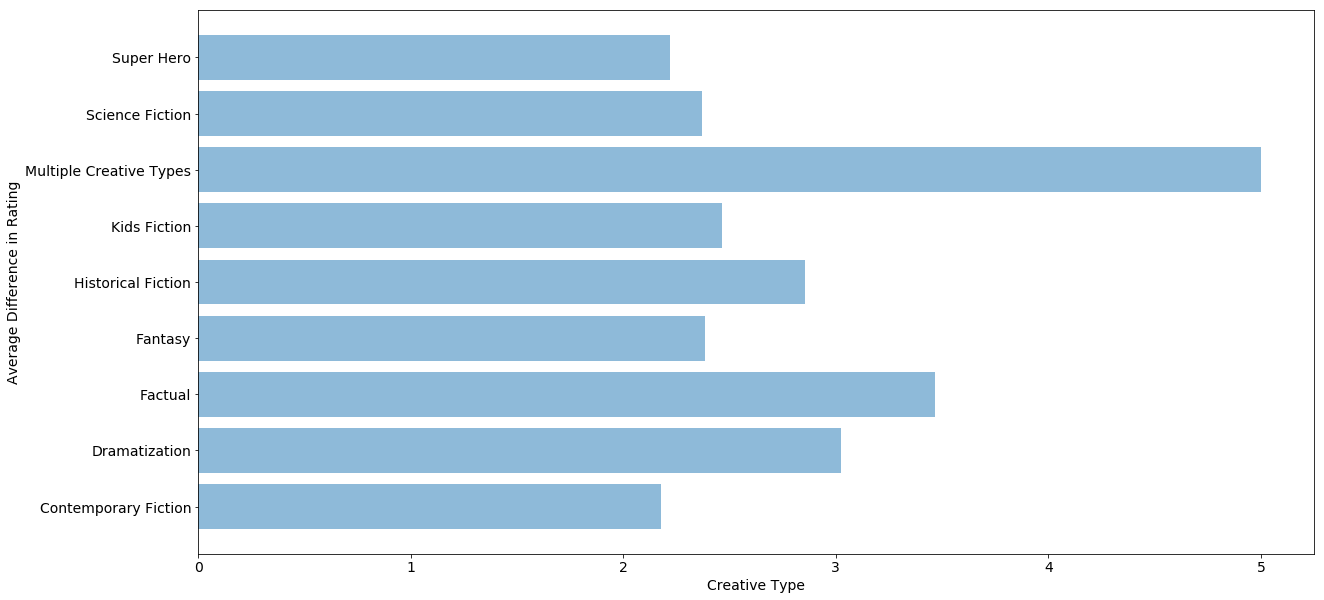

In [28]:
s = movies.groupby('Creative Type')['rating_diff'].mean()

x = s.index
y = s.values

plt.barh(x, y, align='center', alpha=0.5)
plt.ylabel('Average Difference in Rating')
plt.xlabel('Creative Type')

plt.rcParams["figure.figsize"] = [20,10]
plt.rcParams.update({'font.size': 14})
plt.show()

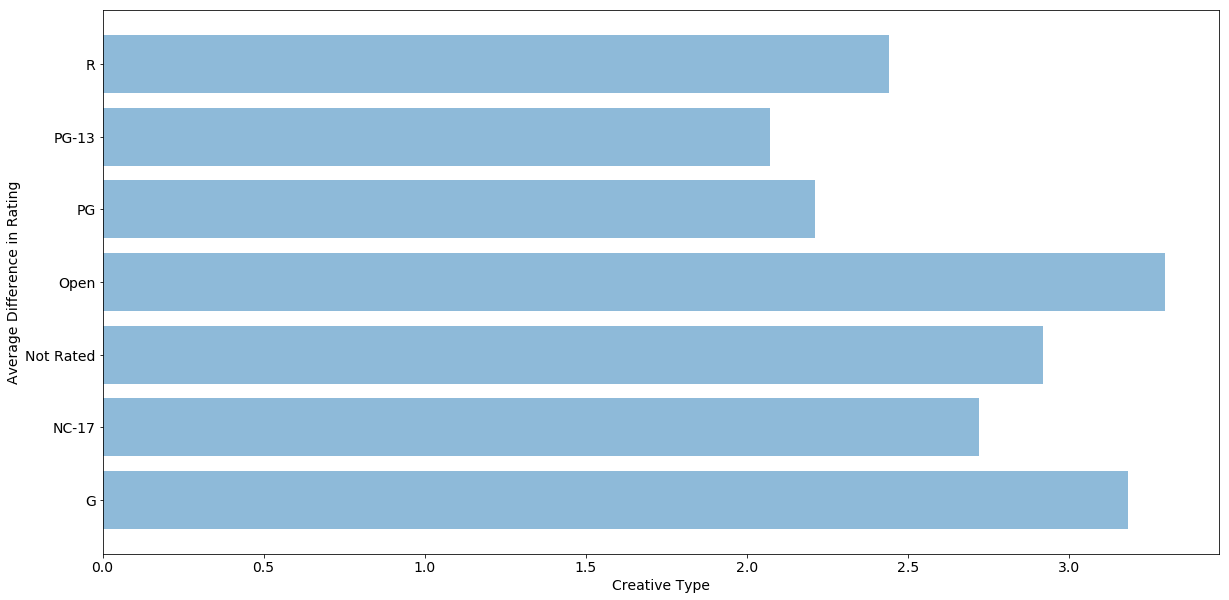

In [29]:
s = movies.groupby('MPAA Rating')['rating_diff'].mean()

x = s.index
y = s.values

plt.barh(x, y, align='center', alpha=0.5)
plt.ylabel('Average Difference in Rating')
plt.xlabel('Creative Type')

plt.rcParams["figure.figsize"] = [20,10]
plt.rcParams.update({'font.size': 14})
plt.show()

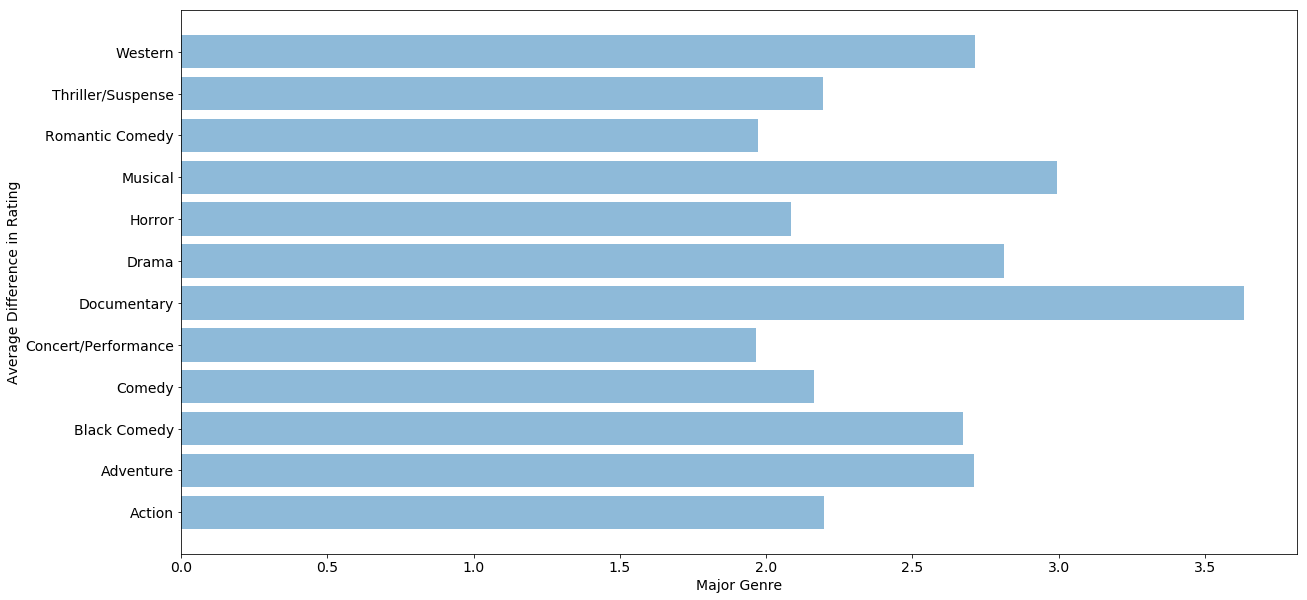

In [30]:
s = movies.groupby('Major Genre')['rating_diff'].mean()

x = s.index
y = s.values

plt.barh(x, y, align='center', alpha=0.5)
plt.ylabel('Average Difference in Rating')
plt.xlabel('Major Genre')

plt.rcParams["figure.figsize"] = [20,10]
plt.rcParams.update({'font.size': 14})
plt.show()


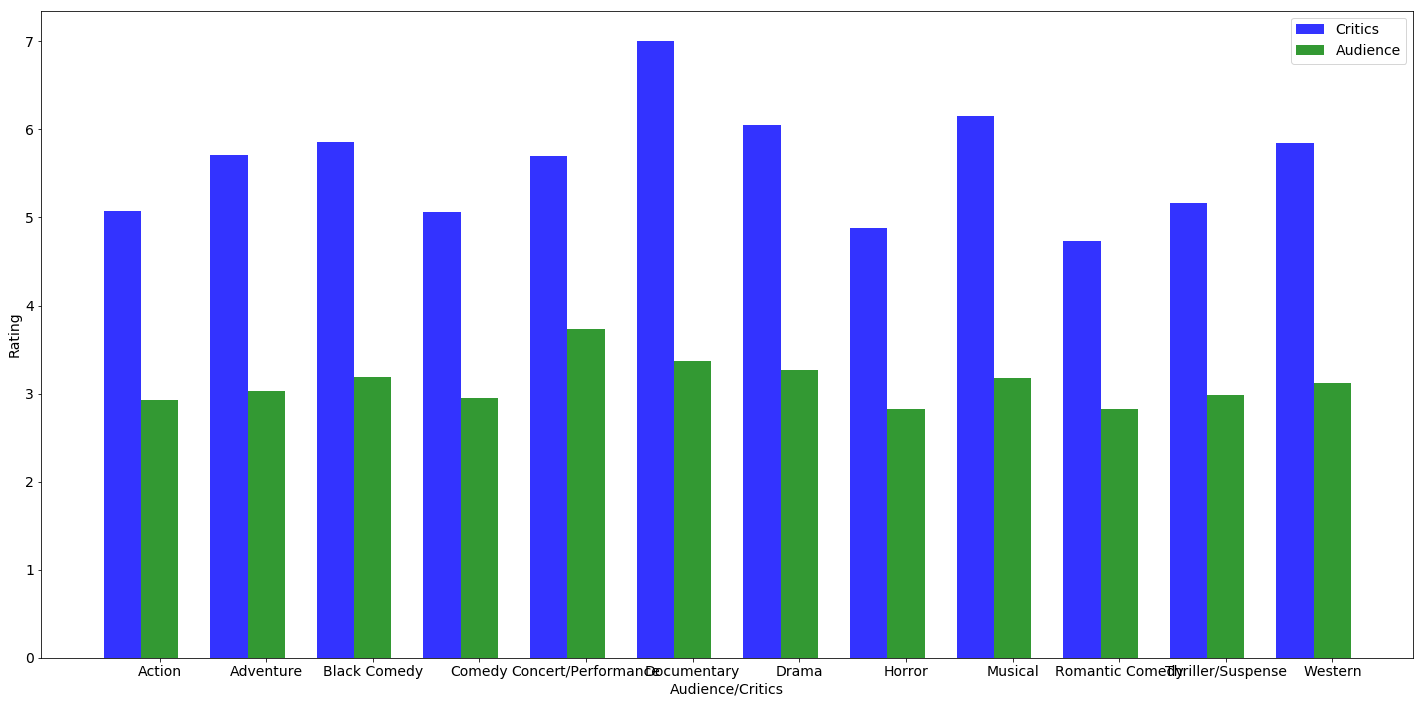

In [31]:
s_c = movies.groupby('Major Genre')['rtAllCriticsRating'].mean()
s_a = movies.groupby('Major Genre')['rtAudienceRating'].mean()

#fig, ax = plt.subplots()
index = np.arange(len(s_c))
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, s_c.values, bar_width,
alpha=opacity,
color='b',
label='Critics')

rects2 = plt.bar(index+bar_width, s_a.values, bar_width,
alpha=opacity,
color='g',
label='Audience')

plt.xlabel('Audience/Critics')
plt.ylabel('Rating')
#plt.title('Scores by person')
plt.xticks(index + bar_width,s_c.index)
plt.legend()

plt.tight_layout()
plt.show()

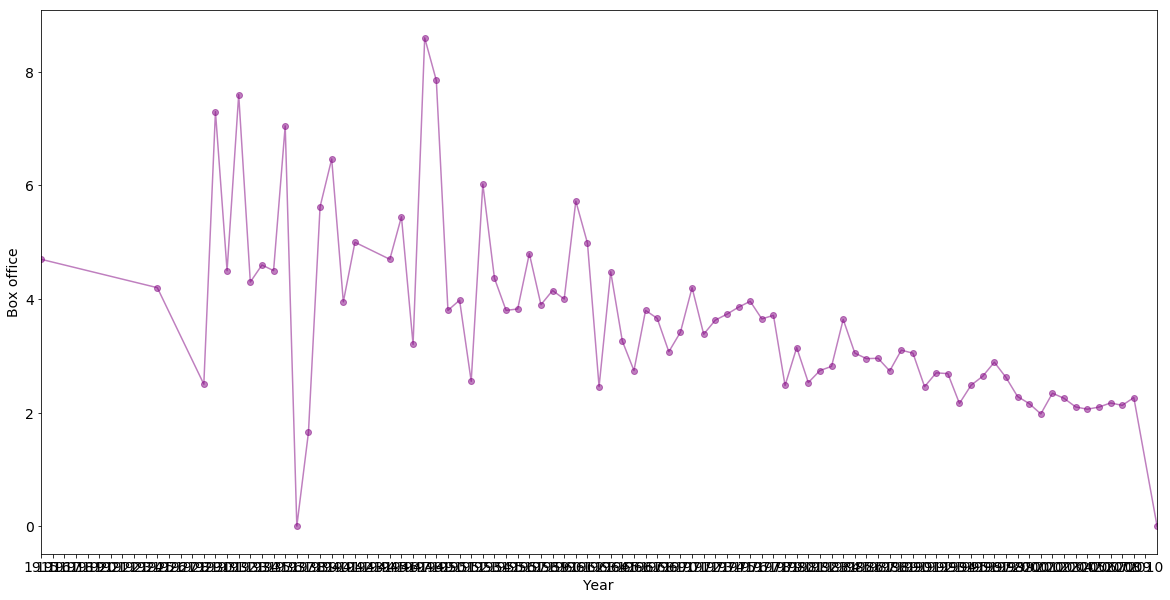

In [32]:
year_boxoffice = movies.groupby('year')['rating_diff'].mean()

x = year_boxoffice.index
y = year_boxoffice.values
fig, ax = plt.subplots()
ax.plot(x, y, color = 'purple', alpha=0.5)
ax.scatter(x, y, color = 'purple', alpha=0.5)
ax.set(xlabel = 'Year', ylabel = 'Box office')
ax.set_xlim([1915,2011])
ax.set_xticks(np.arange(1915,2011))
plt.rcParams["figure.figsize"] = [40,10]
plt.rcParams.update({'font.size': 24})
plt.show()

Step 3. Discussion:

The difference in box office rating can be summarized as(also considering # movies per category):

* Overall, audience provide lesser rating than critics. Drama genre has highest change in rating. 
* R rating has good difference in rating
* The difference in rating has started going in recent years. This might be because of # movies released in recent years.

## Part 2 - Analyzing Movie Reviews* (20 pts)

*This part is adapted from INFX 574 - Core Methods in Data Science Problem Set 5.

Now let's move on to build a Naive Bayes classifier to predict whether a review is Fresh or Rotten, based on the text of the review. I have imported the dataset for you.

In [33]:
# Import movie reviews data
reviews = pd.read_csv("a3-reviews.csv")

### 2.1 Text Cleaning and Unigram Representation (5 pts)

Before we get into the text classification, let's spend some time work with the reviews text! 

Are the reviews clean enough to you? As we will use bag-of-words representation here, we want to reduce the sparse representation. In this part, you will first clean the reviews by:

* Ignoring case
* Ignoring punctuation & extra whitespaces
* Removing stopwords

Then, you will tokenize the reviews; in other words, you are going to convert your text fields into "bag of words" vectors.
One thing that may help you in the following problems is the [`CountVectorizer`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) object in Scikit-learn. This function also provides built-in methods to lower cases, remove punctuations, whitespaces and stopwords. Make sure you read the function documentation and review the lab demos to understand how the process goes. Eventually, you will get a bag-of-words array from your reviews data. Name your complete feature set as X and your target (i.e. rotten or fresh labels) as Y.

* X is a (nreview, nwords) array. Each row corresponds to a bag-of-words representation for a single review. This will be the input to your model.
* Y is a nreview-element 1/0 array, encoding whether a review is Fresh (1) or Rotten (0). This is the desired output from your model.

In [34]:
# Your codes here - for text cleaning & tokenizing
print(reviews.head(10))

               critic  fresh    imdb  \
0         Derek Adams  fresh  114709   
1     Richard Corliss  fresh  114709   
2         David Ansen  fresh  114709   
3       Leonard Klady  fresh  114709   
4  Jonathan Rosenbaum  fresh  114709   
5       Michael Booth  fresh  114709   
6        Geoff Andrew  fresh  114709   
7        Janet Maslin  fresh  114709   
8       Kenneth Turan  fresh  114709   
9         Roger Ebert  fresh  114709   

                                                link        publication  \
0  http://www.timeout.com/film/reviews/87745/toy-...           Time Out   
1  http://www.time.com/time/magazine/article/0,91...      TIME Magazine   
2                  http://www.newsweek.com/id/104199           Newsweek   
3  http://www.variety.com/review/VE1117941294.htm...            Variety   
4  http://onfilm.chicagoreader.com/movies/capsule...     Chicago Reader   
5        http://www.denverpost.com/movies/ci_5786068        Denver Post   
6  http://www.timeout.com/film/rev

In [35]:
print(Counter(reviews['fresh'].values))

print(reviews.shape[0])

Counter({'fresh': 8389, 'rotten': 5030, 'none': 23})
13442


As the data has some records with 'none' as fresh/rotten review, I am going to remove them to avoid confusion.

In [36]:
reviews = reviews.drop(reviews[reviews.fresh == 'none'].index)
print(reviews.shape[0])

13419


In [37]:
corpus = list(reviews['quote'].values) #pull all the reviews  
print("Sample Original text:\n",corpus[0])
RE_PREPROCESS = r'\W+|\d+'
t_corpus = np.array( [re.sub(RE_PREPROCESS, ' ', text).lower() for text in reviews.quote.values])
print("\n\nSample Processed text:\n",t_corpus[0])

ANALYZER = "word"
STRIP_ACCENTS = 'unicode'
NGRAM_RANGE = (0,1)

#This step removes stop words and helps transform data into bag of words structure
vectorizer = CountVectorizer(analyzer="word",
                            tokenizer=None, 
                            ngram_range=NGRAM_RANGE,
                            stop_words = stopwords.words('english'),
                            strip_accents='unicode'
                            #min_df = MIN_DF,
                            #max_df = MAX_DF
                            )

X = vectorizer.fit_transform( t_corpus )
#print(vectorizer.get_feature_names())
print("\n\nReview in bag of words format(X):\n",X.toarray())



Sample Original text:
 So ingenious in concept, design and execution that you could watch it on a postage stamp-sized screen and still be engulfed by its charm.


Sample Processed text:
 so ingenious in concept design and execution that you could watch it on a postage stamp sized screen and still be engulfed by its charm 


Review in bag of words format(X):
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [38]:

t_labels = reviews.fresh.values
le = preprocessing.LabelEncoder() 
le.fit(t_labels)
Y = le.transform(t_labels)
for i in range(len(Y)):
    if Y[i]==0:
        Y[i]=1
    else:
        Y[i]=0
print("Fresh/Rotten in Binary format(Y):\n",Y)

Fresh/Rotten in Binary format(Y):
 [1 1 1 ... 1 0 0]


### 2.2 Train-Test Split (5 pts)

Next, randomly split the data into a training set (67%) and a test set (33%).  One function that may be very helpful is [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Read the documentation and our previous lab demos to understand how the function works.

Name the training set as **X_train** and the corresponding labels as **Y_train**; similarly, name the test set as **X_test** and their labels as **Y_test**.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

### 2.3 Extra Credits ($\leq$ 4 pts): Tuning Hyperparameters

We want to use the training set to train a Naive Bayes classifier using the [`MultinomialNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html).

That calling MultinomialNB() allows us to create a default NB model. However, we often need to tune the hyperparameters of the model for a better performance. Remember the technique for hyperparameters tuning we talked about previously? Cross validation!

The two most important hyperparameters are:

 1. The `min_df` keyword in `CountVectorizer`, which will ignore words which appear in fewer than `min_df` fraction of reviews. Words that appear only once or twice can lead to overfitting, since words which occur only a few times might correlate very well with Fresh/Rotten reviews by chance in the training dataset.
 
 2. The [`alpha` keyword](http://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes) in the Bayesian classifier is a "smoothing parameter" -- increasing the value decreases the sensitivity to any single feature, and tends to pull prediction probabilities closer to 50%. 

We are going to use cross-validation to tune these hyperparameters. The objective function we want to maximize is the **log-likelihood** of our data (the function provided below).  Fill in the remaining code in the block below, to loop over many values of `alpha` and `min_df` to determine which settings are "best" in the sense of maximizing the cross-validated log-likelihood.

*hint: sklearn has a built-in function, [`sklearn.model_selection.cross_val_score`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html), that might save you a lot of time here...*

In [40]:
"""
Function
--------
log_likelihood

Compute the log likelihood of a dataset according to a bayesian classifier. 
The Log Likelihood is defined by

L = Sum_fresh(logP(fresh)) + Sum_rotten(logP(rotten))

Where Sum_fresh indicates a sum over all fresh reviews, 
and Sum_rotten indicates a sum over rotten reviews
    
Parameters
----------
model : Bayesian classifier
x : (nexample, nfeature) array
    The input data
y : (nexample) integer array
    Whether each review is Fresh
"""

#Test code to run Multinomial Naive Bayes with default parameters
clf = MultinomialNB()
clf.fit(X_train, y_train)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

def log_likelihood(fitted_model, x, y):
    prob = fitted_model.predict_log_proba(x)
    #find rotten or fresh in the target
    rotten = y == 0
    fresh = ~rotten
    #the first column of prob indicates the log likelihood of being rotten, while the second ... being fresh
    return prob[rotten, 0].sum() + prob[fresh, 1].sum()

print("Log likelihood of Training: ",log_likelihood(clf,X_train, y_train))
print("Log likelihood of Testing: ",log_likelihood(clf,X_test, y_test))

#score(clf, X_test, y_test, sample_weight=None)

Log likelihood of Training:  -1624.5368856198909
Log likelihood of Testing:  -2491.671898565829


I have written code below to find out best finetuning parameters. But I did not use crossvalidation for it.

In [42]:
#Now it's your turn to find the "best" value for alpha and min_df among these candidates using cross validation
alphas = [0, .1, 1, 5, 10, 50]
min_dfs = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

# initialize
best_alpha = None
best_min_df = None
max_loglike = -np.inf

for ALPHA in alphas:
    for MIN_DF in min_dfs:
        vectorizer = CountVectorizer(analyzer="word",
                            tokenizer=None, 
                            ngram_range=NGRAM_RANGE,
                            stop_words = stopwords.words('english'),
                            strip_accents='unicode',
                            min_df = MIN_DF,
                            #max_df = MAX_DF
                            )
        X = vectorizer.fit_transform(t_corpus)
        t_labels = reviews.fresh.values
        le = preprocessing.LabelEncoder() 
        le.fit(t_labels)
        Y = le.transform(t_labels)
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
        clf = MultinomialNB(alpha=ALPHA, class_prior=None, fit_prior=True)
        clf.fit(X_train, y_train)
        
        #print("Train Alpha: ",ALPHA," min_df:",MIN_DF," log:",log_likelihood(clf,X_train, y_train))
        print("Test Alpha: ",ALPHA," min_df:",MIN_DF," log:",log_likelihood(clf,X_test, y_test))
        
        y_pred_class_t = clf.predict(X_train)
        y_pred_class = clf.predict(X_test)
        if(max_loglike<=log_likelihood(clf,X_test, y_test)):
            max_loglike=log_likelihood(clf,X_test, y_test)
            best_alpha=ALPHA
            best_min_df=MIN_DF
        #print(metrics.accuracy_score(y_test, y_pred_class))
        #print(metrics.accuracy_score(y_train, y_pred_class_t))


        # brief steps to perform hyperparameter tuning ...
        # 0. tokenize the reviews with the current min_df value
        # 1. split the training set into a (k-1) folds training and the remaining fold to be the validation set
        # 2. create a NB model using the current alpha candidate
        # 3. run k-fold crossvalidation and specify log_likelihood function to be the scoring method
        # 4. compare the current performance to the best performance "so far". If greather than the record, update them!
print("Best max loglikelihood: ",max_loglike,"Best alpha: ",best_alpha,"Best min_df:" ,best_min_df)
# Finally, report the "best" value for alpha and min_df

C:\Users\Sakura\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Test Alpha:  0  min_df: 1e-05  log: -24237.86697635937
Test Alpha:  0  min_df: 0.0001  log: -24291.610539386227
Test Alpha:  0  min_df: 0.001  log: -3566.74782475587
Test Alpha:  0  min_df: 0.01  log: -2777.129095403551
Test Alpha:  0  min_df: 0.1  log: -2919.8518790962676
Test Alpha:  0.1  min_df: 1e-05  log: -3556.415226277802
Test Alpha:  0.1  min_df: 0.0001  log: -3542.713683132435
Test Alpha:  0.1  min_df: 0.001  log: -2588.5692807317946
Test Alpha:  0.1  min_df: 0.01  log: -2776.923281015322
Test Alpha:  0.1  min_df: 0.1  log: -2919.8524958306703
Test Alpha:  1  min_df: 1e-05  log: -2491.671898565829
Test Alpha:  1  min_df: 0.0001  log: -2420.624283614268
Test Alpha:  1  min_df: 0.001  log: -2445.6024336479877
Test Alpha:  1  min_df: 0.01  log: -2775.1790455947353
Test Alpha:  1  min_df: 0.1  log: -2919.85804512697
Test Alpha:  5  min_df: 1e-05  log: -2997.24069198377
Test Alpha:  5  min_df: 0.0001  log: -2542.1246092760794
Test Alpha:  5  min_df: 0.001  log: -2358.072956786858
T

### 2.4 Rotten or Fresh? Reviews Classification using Naive Bayes (5 pts)
Now let's train a Naive Bayes classifier!
* If you have completed the Part 2.3, use the hyperparameters that you chose from cross validation.
* If you haven't tuned the model, you may start with a default NB model and perhaps apply your instinct and wisdom to decide the hyperparameters.

Report the accuracy of this model on both the training (67%) and test data (33%).  What do you observe?  Interpret these results!

In [43]:
# Your codes here - for NB model training

vectorizer = CountVectorizer(analyzer="word",
                            tokenizer=None, 
                            ngram_range=NGRAM_RANGE,
                            stop_words = stopwords.words('english'),
                            strip_accents='unicode',
                            min_df = best_min_df,
                            max_df = .95
                            )
X = vectorizer.fit_transform(t_corpus)
t_labels = reviews.fresh.values
le = preprocessing.LabelEncoder() 
le.fit(t_labels)
Y = le.transform(t_labels)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
clf = MultinomialNB(alpha=best_alpha, class_prior=None, fit_prior=True)
clf.fit(X_train, y_train)

y_pred_class_t = clf.predict(X_train)
y_pred_class = clf.predict(X_test)

from sklearn import metrics
print("Accuracy in Training set: ", metrics.accuracy_score(y_train, y_pred_class_t))
print("Accuracy in Testing set: ",metrics.accuracy_score(y_test, y_pred_class))


Accuracy in Training set:  0.7899888765294772
Accuracy in Testing set:  0.741702415895236


Discussion:

I have set the best min_df & alpha values in addition to setting max_df to a default of .95(remove words which occur at more than 95% of the reviews). The accuracy in training dataset is more than testing dataset(which might be due to slight overfitting). 

### 2.5 Extra Credits ($\leq$ 2 pts): Adding Text Normalization
Previously, we cleaned the reviews by ignoring cases, removing stopwords, extra whitespaces and punctuations. Now, let's also try to reduce words to their stems. Use the PorterStemmer algorithm to perform word stemming on movie review strings. The NLTK package has an implementation of this algorithm. Then, extract bag-of-words features based on the stemmed data and conduct machine learning experiments again as you did from 2.2 to 2.4. Compare the performance of this NB model with the performance in 2.4.

In [44]:
# Your codes here - for incorporating stemming
stemmer = PorterStemmer()
tokenize = lambda x: [stemmer.stem(i) for i in x.split()]
vectorizer = CountVectorizer(analyzer="word",
                            tokenizer=tokenize, 
                            ngram_range=NGRAM_RANGE,
                            stop_words = stopwords.words('english'),
                            strip_accents='unicode',
                            min_df = best_min_df,
                            max_df = .95
                            )
X = vectorizer.fit_transform(t_corpus)
t_labels = reviews.fresh.values
le = preprocessing.LabelEncoder() 
le.fit(t_labels)
Y = le.transform(t_labels)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
clf = MultinomialNB(alpha=best_alpha, class_prior=None, fit_prior=True)
clf.fit(X_train, y_train)

y_pred_class_t = clf.predict(X_train)
y_pred_class = clf.predict(X_test)

from sklearn import metrics
print("Accuracy in Training set: ", metrics.accuracy_score(y_train, y_pred_class_t))
print("Accuracy in Testing set: ",metrics.accuracy_score(y_test, y_pred_class))



Accuracy in Training set:  0.7957730812013348
Accuracy in Testing set:  0.7446376157146083


The training & testing accuracy has improved slightly. But not much. 

### 2.6 Interpretation (5 pts)
What words best predict a fresh or rotten review?  Using your classifier and the `vectorizer.get_feature_names` method, determine which words best predict a positive or negative review. Print the 10 words that best predict a "fresh" review, and the 10 words that best predict a "rotten" review. For each word, what is the model's probability of freshness if the word appears one time?

#### Hints
* In thinking about how to measure the impact of a word on freshness rating, consider computing the classification probability for a feature vector which consists of all 0s, except for a single 1. What does this probability refer to?
* `numpy.identity` generates an identity matrix, where all values are zero except the diagonal elements which have a value of one

In [196]:
result1=pd.DataFrame()
X = vectorizer.fit_transform(t_corpus)
x1=vectorizer.get_feature_names()
y_score = clf.predict_proba(X)
k=0
for i in range(len(y_score)):
    if (X[i,:].getnnz()==1):
        h=X[i,:].toarray()
        for j in range(h.shape[1]):
            if h[0,j]!=0:
                #print(x1[j], y_score[i])
                result1.loc[k,0]=x1[j]
                result1.loc[k,1]=y_score[i][0]
                result1.loc[k,2]=y_score[i][1]
                k=k+1
result1.rename(columns={0:'words',1:'fresh',2:'rotten'},inplace=True)
#print(result1)

I am creating a dataframe, where I consider only the lines where only 1 word has 1 in the feature vector. 
This way, the predicted Y value will be based on that word. 

I have scored the model on whole dataset and not on Training/Testing data. If it has to be done, I will just replace the whole dataset(X) by training data(X_train) and Y values respectively

In [198]:
result2_rotten=pd.DataFrame(result1.groupby('words')['rotten'].mean())
result2_rotten=result2_rotten.reset_index()
result2_rotten=result2_rotten.sort_values(by=['rotten'], ascending=False)
print("Top 10 words that best predict rotten review with their probability:\n",result2_rotten.head(10))

result2_fresh=pd.DataFrame(result1.groupby('words')['fresh'].mean())
result2_fresh=result2_fresh.reset_index()
result2_fresh=result2_fresh.sort_values(by=['fresh'], ascending=False)
print("\n\nTop 10 words that best predict fresh review with their probability:\n",result2_fresh.head(10))


Top 10 words that best predict rotten review with their probability:
               words    rotten
285   unfortunately  0.850811
47    disappointing  0.778479
189       pointless  0.778479
48   disappointment  0.778479
52             dull  0.772258
286         unfunny  0.758706
264         tedious  0.744017
151       misguided  0.735057
59            empty  0.721405
92        formulaic  0.711494


Top 10 words that best predict fresh review with their probability:
              words     fresh
42         delight  0.880282
143    masterpiece  0.866451
66    entertaining  0.862123
190       powerful  0.854802
296          witty  0.854440
176        perfect  0.851433
80   extraordinary  0.847585
15       beautiful  0.846269
155         moving  0.846269
200           rare  0.838457


## Part 3 - Analyzing Networks (14 pts)

### 3.1. Understanding Classic Centrality Measures* (6 pts)
*This part is adapted from INFX 576: Social Network Analysis

Please describe possible network configurations/local properties that fit each white cell (six in total) except for diagonal cells:

|                  | Low Degree | Low Betweenness | Low Closeness |
|------------------|------------|-----------------|---------------|
| High Degree      |    NA      |                 |               |
| High Betweenness |            |      NA         |               |
| High Closeness   |            |                 |       NA      |

Your response:

I am not entirely sure about answering this question. Since this question is placed before importing of data. I am assuming that this has to be a descriptive answer. 


|                  | Low Degree             | Low Betweenness | Low Closeness     |
|------------------|------------------------|-----------------|-------------------|
| High Degree      |    NA                  | Youtube channel |    Celebrity      |
| High Betweenness |     Brokers/ Agents    |      NA         | Delivery Service  |
| High Closeness   | Collaborative projects |     Forums      |       NA          |

High Degree & Low Betweeness: When a node is highly popular(has lot of connections), but it will not serve as connecting point to other nodes. Example would be Youtube channel where lot of people come together and make connection. But it is the end point. It will not be used as connecting to another community or person. 

High Degree & Low Closeness:When a node is popular, and is not close to other nodes. (Eg) would be highly popular individuals who are one of a kind. Many people might connect to Jeff Bezos, but he would still have a smaller circle around him(when compared to its degree). Another example would be antartica. Though it is famous, and lot of people know about it, it is rarely closely connected to people.

High Betweeness & Low Degree: These are intermediate nodes with less importance. Example would be celebrity managers. They are the most approached person to reach celebrity. But they by themselves dont have a popular image.

High Betweeness & Low Closeness: These nodes serve as connection nodes, might have or not have high degree(USPS vs small courier companies), but they are not close to any particular group or individual. They are equally connected to most.

High Closeness & Low Degree: These are normal people working together in closely knit groups. Example would be few scientists working on top secret project. They are close, but they are not known to general public.

High Closeness & Low Betweeness: People come together in forums and discuss about their favorite topic. They would be closely related based on the topic of interest. But they will not communicate outside or use the contacts for further purpose.


### 3.2. Understanding Nodes, Degree and Density (8 pts)

In this question, we will explore an [organizational chart](https://en.wikipedia.org/wiki/Organizational_chart) that shows the structure of an organization and the relationships and relative ranks of its parts and positions/jobs. The nodes represent positions and the edges represent supervision relationships.

#### 3.2.1. (2 pts) Construct the network and report the size of the network including the number of nodes and edges. 

I have imported the data for you :D

In [45]:
# This reads the CSV file. Not a network yet.
EdgesAsDF = pd.read_csv('organizational_chart.txt', delimiter='\t')
# This reads the node labels
#position_labels = pd.read_csv('organizational_position_names.txt', delimiter='\t',index_col = 'node')
position_labels = pd.read_csv('organizational_position_names.txt', delimiter='\t')

In [46]:
# Take a look at the network dataframe data
print(EdgesAsDF.head(15))
print(EdgesAsDF.shape)

    to  from
0    1     2
1    1     3
2    1     4
3    1     5
4    2     6
5    2     7
6    3     8
7    3     9
8    4    10
9    4    11
10   5    12
11   5    13
12   5    14
13   2    15
14   2    16
(15, 2)


In [47]:
# Take a look at the network labels
# you can use .relabel_nodes() method to update node labels after you have constructed the network
# read the doc: https://networkx.github.io/documentation/latest/reference/generated/networkx.relabel.relabel_nodes.html
print(position_labels)


    node                position
0      1               President
1      2     VP Account Services
2      3    VP Creative Services
3      4   VP Marketing Services
4      5  VP Management Services
5      6      Account Supervisor
6      7      Account Supervisor
7      8                Art/Copy
8      9              Production
9     10                   Media
10    11                Research
11    12              Accounting
12    13              Purchasing
13    14               Personnel
14    15       Account Executive
15    16       Account Executive


Number of nodes:  16
Number of edges:  15


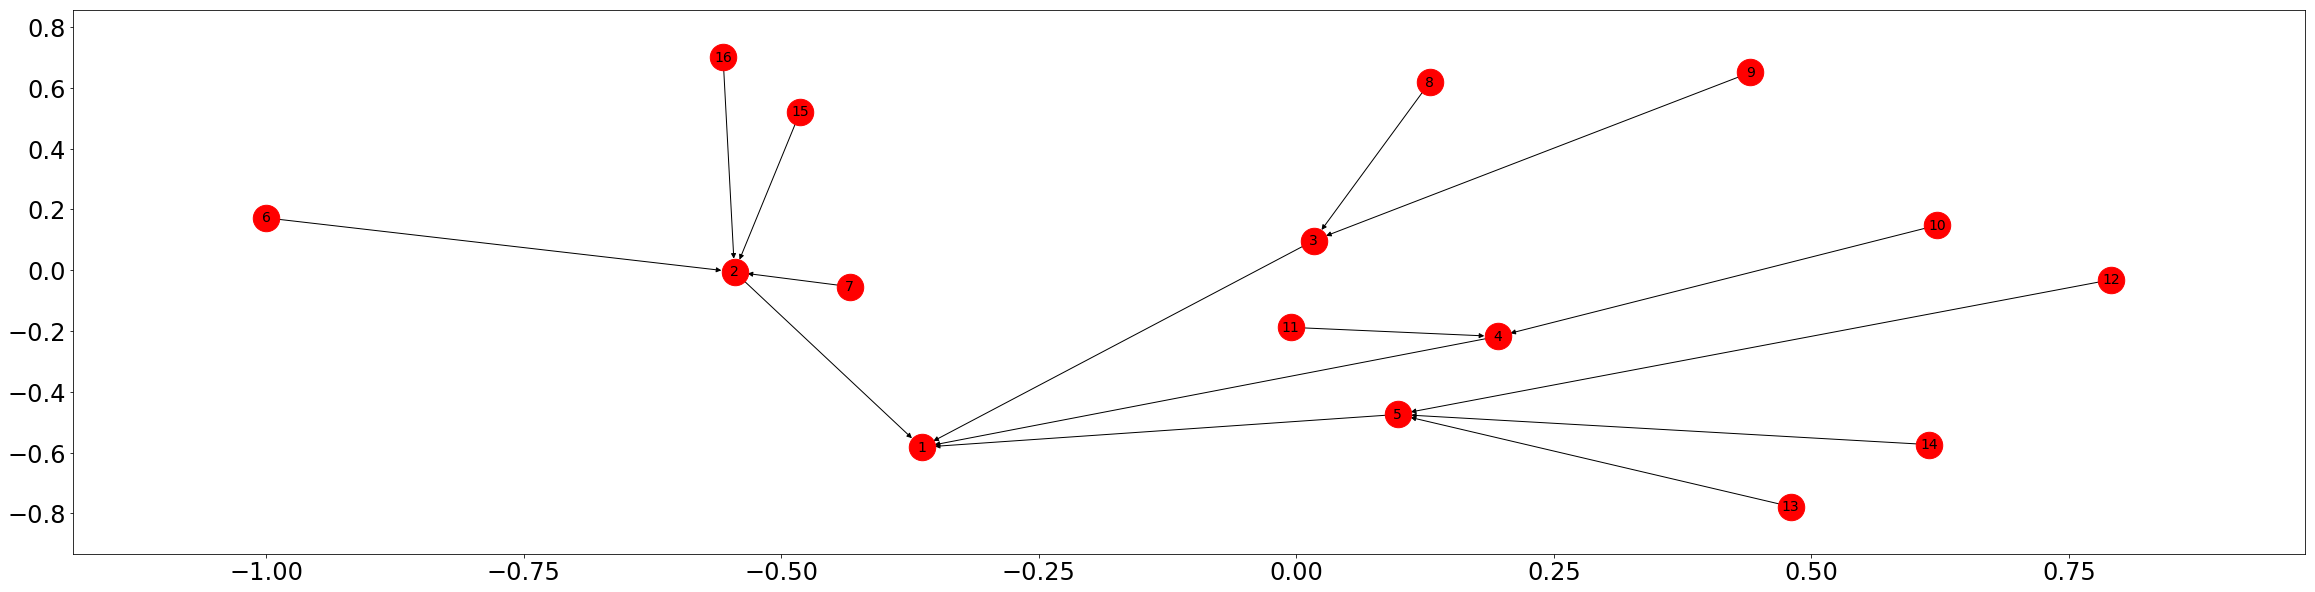

In [48]:
# Now it's your turn to construct the network from the edgelist
# Your codes here

#import pygraphviz

G=nx.from_pandas_edgelist(EdgesAsDF, 'from', 'to',create_using=nx.DiGraph())

print("Number of nodes: ",G.number_of_nodes())
print("Number of edges: ",G.number_of_edges())
#pos=nx.graphviz_layout(G, prog='dot')
nx.draw_networkx(G, pos=None, arrows=True, with_labels=True,node_size=700,font_size=14)
plt.show()

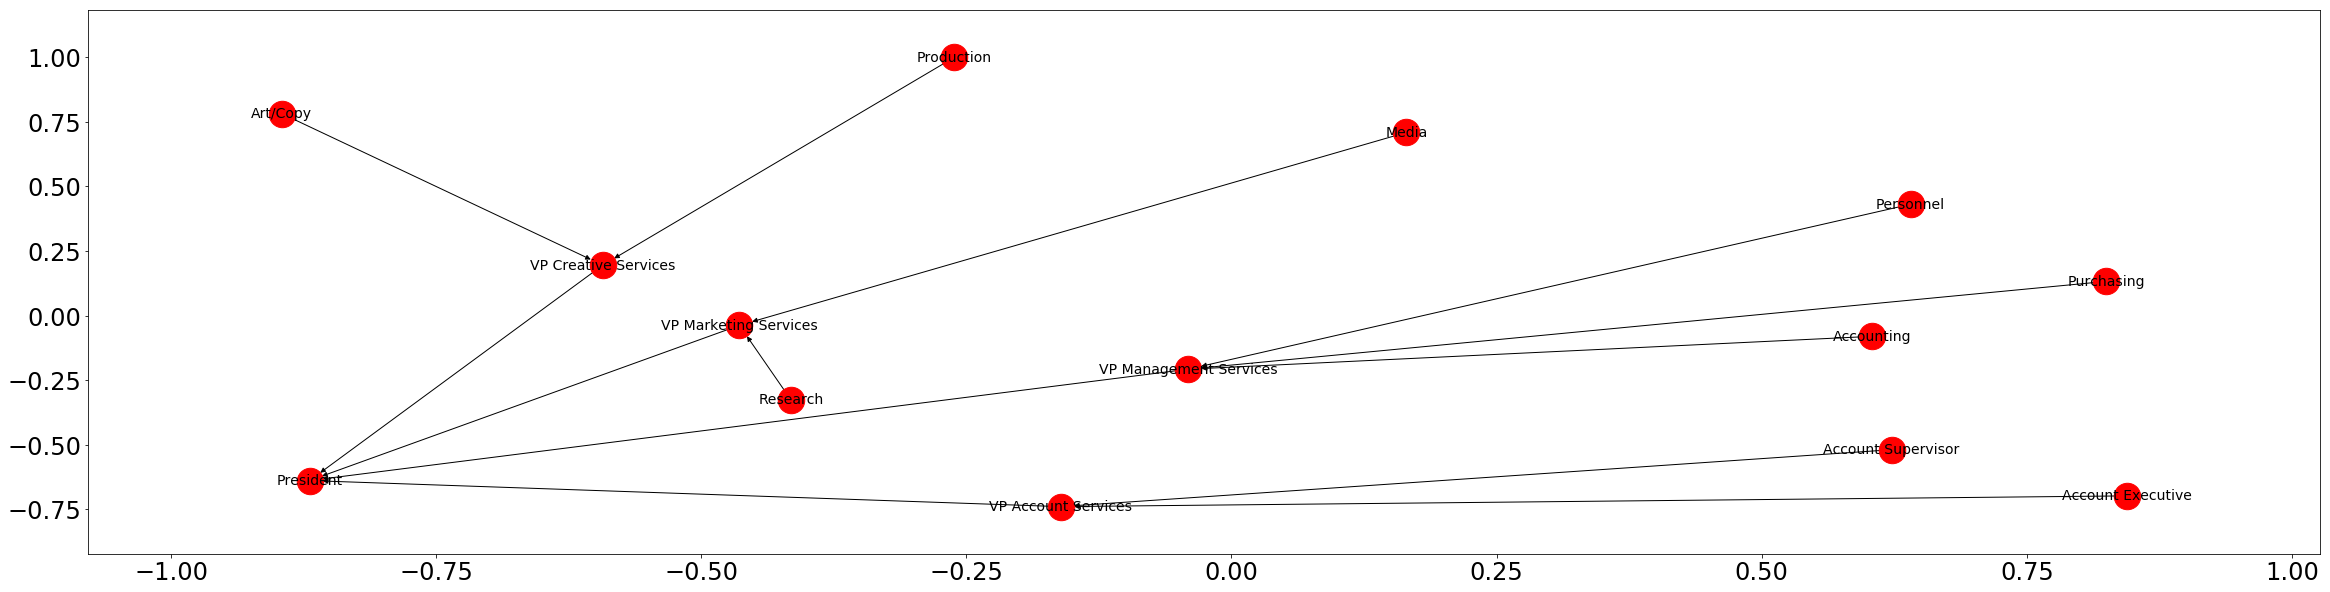

In [50]:
# you might also consider create a visualization to present the network

d= dict([(i,a) for i, a in zip(position_labels.node, position_labels.position)])
#print(d)

H=nx.relabel_nodes(G,d)
nx.draw_networkx(H, pos=nx.spring_layout(H), arrows=True, with_labels=True,node_size=700,font_size=14)
plt.show()


#### 3.2.2. (2 pts) Report the degree of each node and plot a histogram to show the degree distribution of this network

Degree of each node:
                     Label  Degree
0      VP Account Services       3
1                President       4
2     VP Creative Services       3
3    VP Marketing Services       3
4   VP Management Services       4
5       Account Supervisor       1
6                 Art/Copy       1
7               Production       1
8                    Media       1
9                 Research       1
10              Accounting       1
11              Purchasing       1
12               Personnel       1
13       Account Executive       1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001889E85EEF0>]],
      dtype=object)

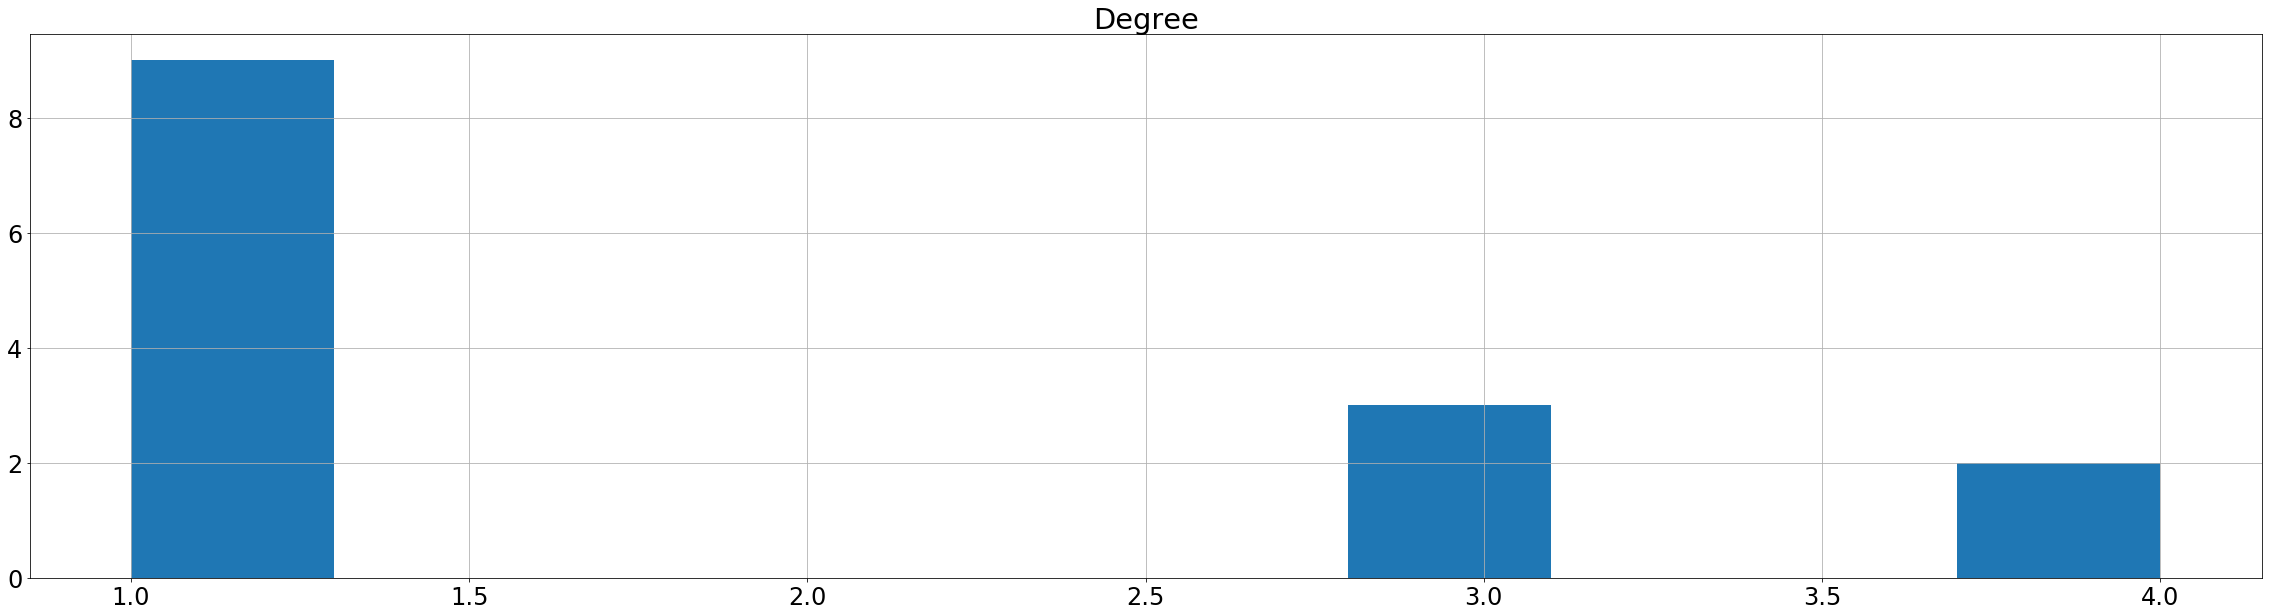

In [51]:
# Your codes here - report degre and plot degree distribution histogram
print("Degree of each node:")
N=list(H.degree())
df = pd.DataFrame(N, columns=['Label', 'Degree'])
print(df)
df.hist()

Most of the nodes have 1 degree, 3 nodes with 3 degree and 4 nodes with 2 degree.

#### 3.2.3. (4 pts) Which position is most influential in this network? Compute and compare three types of centrality (i.e. degree, betweenness and closeness centrality).  Discuss your findings.

In [52]:
# Your codes here
print("Degree Centrality:",nx.degree_centrality(H))
print("Betweenness centrality:\n",nx.betweenness_centrality(H))
print("Closeness centrality:\n",nx.closeness_centrality(H))


Degree Centrality: {'VP Account Services': 0.23076923076923078, 'President': 0.3076923076923077, 'VP Creative Services': 0.23076923076923078, 'VP Marketing Services': 0.23076923076923078, 'VP Management Services': 0.3076923076923077, 'Account Supervisor': 0.07692307692307693, 'Art/Copy': 0.07692307692307693, 'Production': 0.07692307692307693, 'Media': 0.07692307692307693, 'Research': 0.07692307692307693, 'Accounting': 0.07692307692307693, 'Purchasing': 0.07692307692307693, 'Personnel': 0.07692307692307693, 'Account Executive': 0.07692307692307693}
Betweenness centrality:
 {'VP Account Services': 0.01282051282051282, 'President': 0.0, 'VP Creative Services': 0.01282051282051282, 'VP Marketing Services': 0.01282051282051282, 'VP Management Services': 0.019230769230769232, 'Account Supervisor': 0.0, 'Art/Copy': 0.0, 'Production': 0.0, 'Media': 0.0, 'Research': 0.0, 'Accounting': 0.0, 'Purchasing': 0.0, 'Personnel': 0.0, 'Account Executive': 0.0}
Closeness centrality:
 {'VP Account Service

Discussion:

Based on Degree Centrality: President & VP Management Services are important nodes
Based on Betweeness Centrality: VP Management Services is important
Based on Closeness Centrality: President is important
    
So overall we can conclude that President & VP Management Services are important positions.

#### 3.2.4. Extra Credits ($\leq$ 4 pts): In general, find the density of an arbitrary formal hierarchy (e.g.  an organizational chart) as a function of organizational size. Justify your answer.

In [53]:
print("Density of organizational chart:", nx.density(H))

Density of organizational chart: 0.07142857142857142


The density is low, because the data is organized in terms of hierarchial relationship. If there was a central node with close multiple connections, density would have been higher.